In [1]:
import sys
import os


sys.path.append(os.path.abspath("../..")) #make the folder "automl" part of this

RESULTS_PATH = 'results.csv'
OPTUNA_DATABASE = 'study_results.db'
BASE_CONFIGURATION_NAME = 'configuration'


In [2]:
from automl.loggers.result_logger import ResultLogger
import optuna
import optuna.visualization as vis
from automl.utils.optuna_utils import load_study_from_database
import matplotlib.pyplot as plt


c:\Users\rgoncalo\anaconda3\envs\AIPython\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the experiment

In [3]:
base_experiment_path = "C:\\Experiments\\rl-zoo-CartPole-dqn-2\\HPOptimizationExperiments\\2\\experiments"
experiment_relative_path = 'original'
experiment_path = f'{base_experiment_path}\\{experiment_relative_path}'

In [4]:
if not os.path.exists(experiment_path):
    raise Exception("DOES NOT EXIST")

# Evaluation of HyperparameterOptimizationPipeline

In [5]:
from automl.hp_opt.hp_eval_results.hp_eval_results import get_hp_opt_results_logger

hyperparameter_optimization_results = get_hp_opt_results_logger(experiment_path)

print(f"Hyperparameter_optimization_results in path: {hyperparameter_optimization_results.get_artifact_directory()}")

Hyperparameter_optimization_results in path: C:\Experiments\rl-zoo-CartPole-dqn-2\HPOptimizationExperiments\2\experiments\original\


In [6]:
from automl.hp_opt.hp_eval_results.hp_eval_results import get_hp_opt_optuna_study


optuna_study = get_hp_opt_optuna_study(hyperparameter_optimization_results)


## Hyperparameter Study

In [7]:
try:
    print(f"optuna_study done with with best value {optuna_study.best_value} in trial {optuna_study.best_trial.number} with best parameters:\n{optuna_study.best_params}")

except:
    print("No best trial yet")

optuna_study done with with best value 500.0 in trial 57 with best parameters:
{'dqn_algorithm': "<class 'automl.rl.learners.q_learner.DeepQLearnerSchema'>", 'discount_factor': 0.9491516608050186, 'learning_rate': 0.03666753596581527, 'target_update_rate': 0.7658230388861746, 'learning_start_step_delay': 2014, 'epsilon_end': 0.07923801286506417, 'clip_grad_value': 0.4317217863563736, 'optimization_interval': 262}


In [8]:
from automl.hp_opt.hp_eval_results.hp_eval_results import print_optuna_trials_info

print_optuna_trials_info(optuna_study)


===== Trials Info =====
Trial 0:
  State: 1
  Value: 8.823223304703363
  Params: {'dqn_algorithm': "<class 'automl.rl.learners.q_learner.DeepQLearnerSchema'>", 'discount_factor': 0.99, 'learning_rate': 0.0023, 'target_update_rate': 1.0, 'learning_start_step_delay': 1000, 'epsilon_end': 0.04, 'clip_grad_value': 0.10669115265795681, 'optimization_interval': 256}
  User attrs: {}
  System attrs: {'fixed_params': {'dqn_algorithm': "<class 'automl.rl.learners.q_learner.DeepQLearnerSchema'>", 'discount_factor': 0.99, 'learning_rate': 0.0023, 'target_update_rate': 1.0, 'learning_start_step_delay': 1000, 'epsilon_end': 0.04, 'optimization_interval': 256}}
----------------------------------------
Trial 1:
  State: 1
  Value: 22.321350343362454
  Params: {'dqn_algorithm': "<class 'automl.rl.learners.q_learner.DeepQLearnerSchema'>", 'discount_factor': 0.7716706752836813, 'learning_rate': 0.06516525192229627, 'target_update_rate': 0.7210047827055965, 'learning_start_step_delay': 2478, 'epsilon_en

In [9]:
from optuna.visualization import plot_slice

fig = plot_slice(optuna_study)
fig.show()

In [10]:
from automl.hp_opt.hp_eval_results.hp_eval_results import print_optuna_param_importances

print_optuna_param_importances(optuna_study)

clip_grad_value: 0.3929
learning_rate: 0.1528
discount_factor: 0.1418
epsilon_end: 0.1312
target_update_rate: 0.0685
optimization_interval: 0.0593
learning_start_step_delay: 0.0531
dqn_algorithm: 0.0004


In [11]:
fig = vis.plot_param_importances(optuna_study)
fig.show()

In [12]:


fig = vis.plot_parallel_coordinate(optuna_study)
fig.show()

In [13]:
fig = vis.plot_intermediate_values(optuna_study)
fig.show()

In [14]:
fig = vis.plot_optimization_history(optuna_study)
fig.show()

In [15]:
from automl.hp_opt.hp_eval_results.hp_eval_results import plot_scattered_values_for_param

if False: # this is not really necessary here, it is best to use it studying single configurations

    try:
        plot_scattered_values_for_param(optuna_study)

    except Exception as e:
        print(f"Could not plot scattered values because of error: {e}")

In [16]:
parameters_to_plot = []
# parameters_to_plot = ["hidden_size", "hidden_layers"]

if len(parameters_to_plot) > 1:

    fig = vis.plot_contour(optuna_study, params=parameters_to_plot)
    fig.show()

# Global evaluation of configurations

In [17]:
AGGREGATE_NUMBER = 10 #the number of neighbor points to sum to plot the needed graphs

In [18]:
from automl.hp_opt.hp_eval_results.hp_eval_results import study_of_configuration                          


In [19]:
from automl.hp_opt.hp_eval_results.hp_eval_results import get_results_of_configurations                          



results_of_configurations : dict[str, ResultLogger] = get_results_of_configurations(experiment_path)

In [20]:
print(f"Configurations:  {results_of_configurations.keys()}")

Configurations:  dict_keys(['configuration_0', 'configuration_1', 'configuration_10', 'configuration_100', 'configuration_101', 'configuration_102', 'configuration_103', 'configuration_104', 'configuration_105', 'configuration_106', 'configuration_107', 'configuration_108', 'configuration_109', 'configuration_11', 'configuration_110', 'configuration_111', 'configuration_112', 'configuration_113', 'configuration_114', 'configuration_115', 'configuration_116', 'configuration_117', 'configuration_118', 'configuration_119', 'configuration_12', 'configuration_120', 'configuration_121', 'configuration_122', 'configuration_123', 'configuration_124', 'configuration_125', 'configuration_126', 'configuration_127', 'configuration_128', 'configuration_129', 'configuration_13', 'configuration_130', 'configuration_131', 'configuration_132', 'configuration_133', 'configuration_134', 'configuration_135', 'configuration_136', 'configuration_137', 'configuration_138', 'configuration_139', 'configuration

# Global view of performance

In [21]:
steps_done = hyperparameter_optimization_results.list_of_unique_values("step")
print(steps_done)

[0, 1]


c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



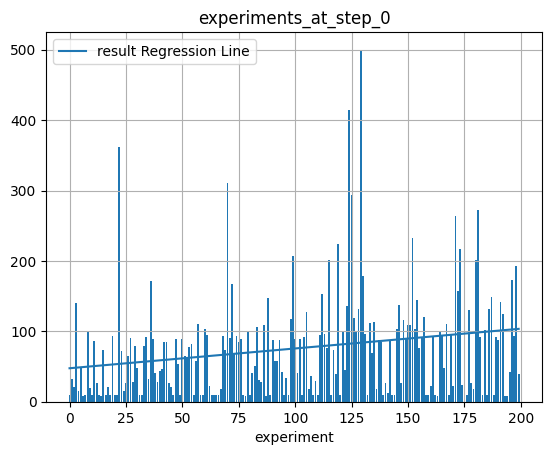

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



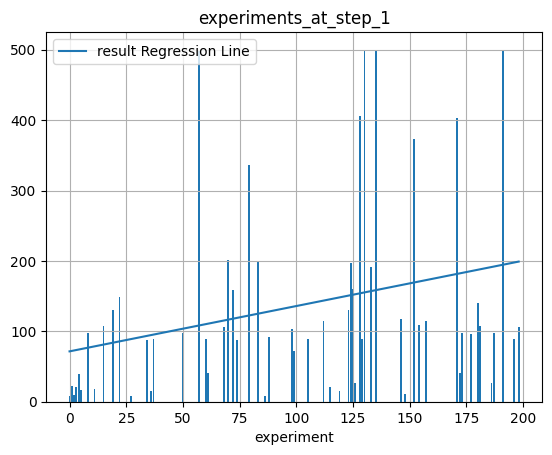

In [22]:
for step in steps_done:

    hyperparameter_optimization_results.plot_bar_graph(x_axis='experiment', y_axis='result', to_show=False, fixed_value_tuple=("step", step))
    hyperparameter_optimization_results.plot_linear_regression(x_axis='experiment', y_axis='result', to_show=False, fixed_value_tuple=("step", step))
    hyperparameter_optimization_results.plot_current_graph(title=f'experiments_at_step_{step}')

## Pruned Performances

In [23]:
from automl.hp_opt.hp_eval_results.hp_eval_results import get_pruned_trials                          


pruned_optuna_trials, pruned_optuna_trials_per_steps, pruned_trials = get_pruned_trials(optuna_study)

print(f"Pruned trials: {pruned_trials}")


Pruned trials: ['configuration_7', 'configuration_8', 'configuration_10', 'configuration_11', 'configuration_13', 'configuration_14', 'configuration_15', 'configuration_17', 'configuration_18', 'configuration_19', 'configuration_21', 'configuration_22', 'configuration_24', 'configuration_25', 'configuration_26', 'configuration_27', 'configuration_29', 'configuration_30', 'configuration_31', 'configuration_32', 'configuration_33', 'configuration_34', 'configuration_36', 'configuration_39', 'configuration_40', 'configuration_41', 'configuration_42', 'configuration_43', 'configuration_44', 'configuration_45', 'configuration_46', 'configuration_47', 'configuration_48', 'configuration_49', 'configuration_50', 'configuration_52', 'configuration_53', 'configuration_54', 'configuration_55', 'configuration_56', 'configuration_57', 'configuration_59', 'configuration_60', 'configuration_63', 'configuration_64', 'configuration_65', 'configuration_66', 'configuration_67', 'configuration_68', 'confi

### Worst Pruned Trials

In [24]:
WORST_PRUNED = 3

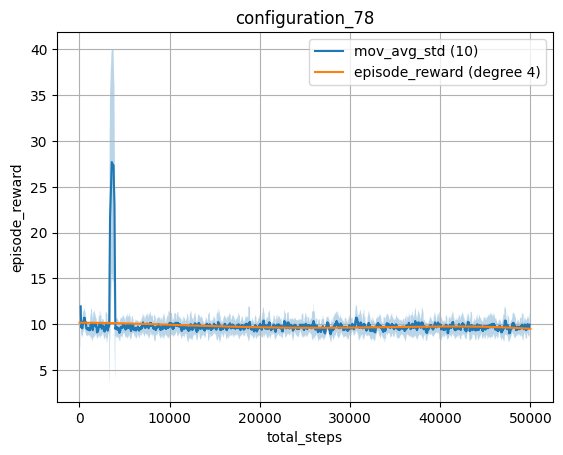

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



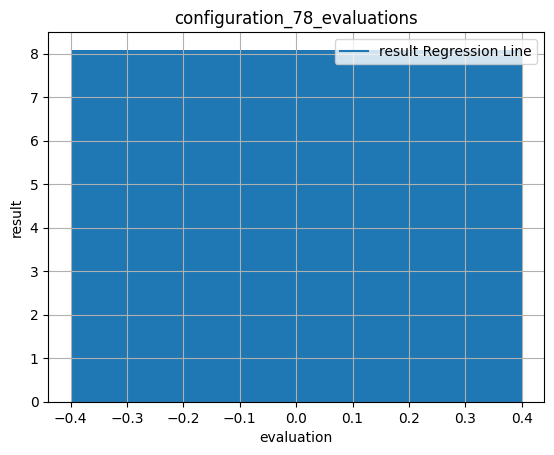

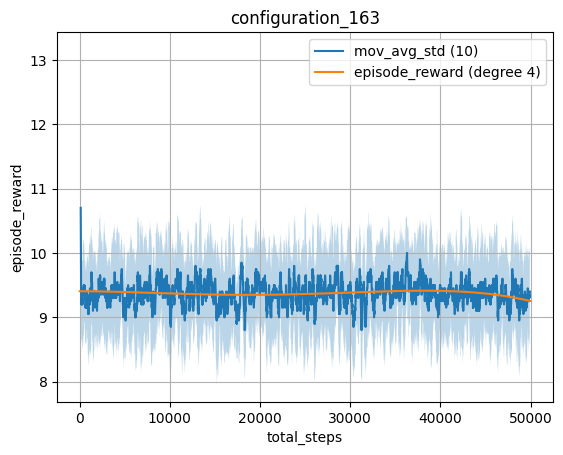

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



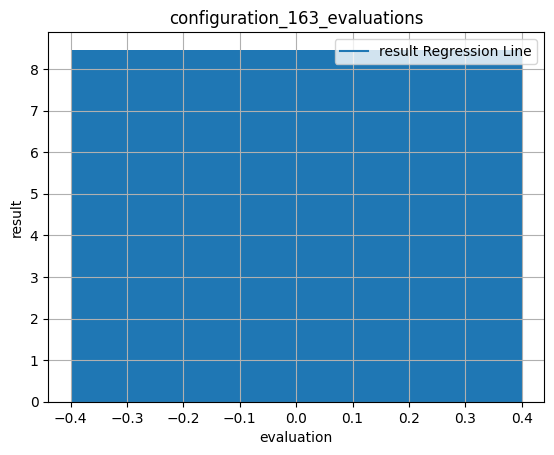

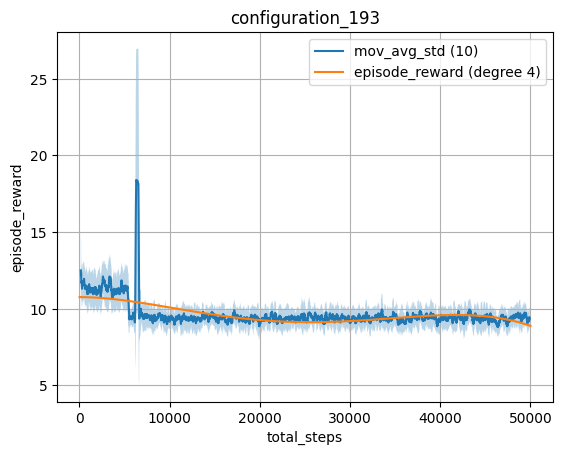

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



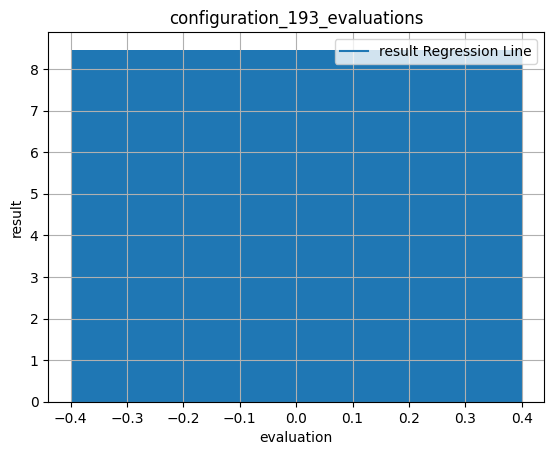

In [25]:
for n_completed_steps in pruned_optuna_trials_per_steps.keys():
    
    pruned_optuna_trials : list[optuna.Trial] = pruned_optuna_trials_per_steps[n_completed_steps][0:WORST_PRUNED] 
    
    pruned_trials = [f'configuration_{trial.number}' for trial in pruned_optuna_trials ]

    for configuration_name in pruned_trials:
        
        results_logger = results_of_configurations[configuration_name]
    
        study_of_configuration(configuration_name, results_logger)

### Best Pruned Trials

In [26]:
BEST_PRUNED = 3

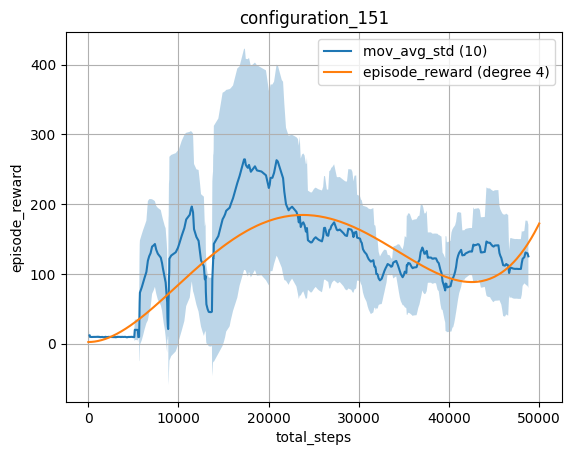

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



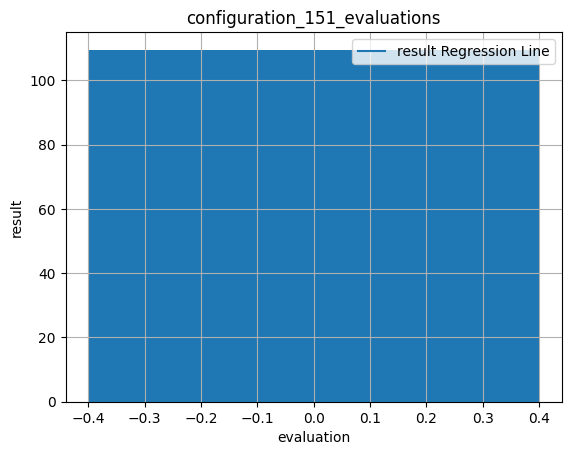

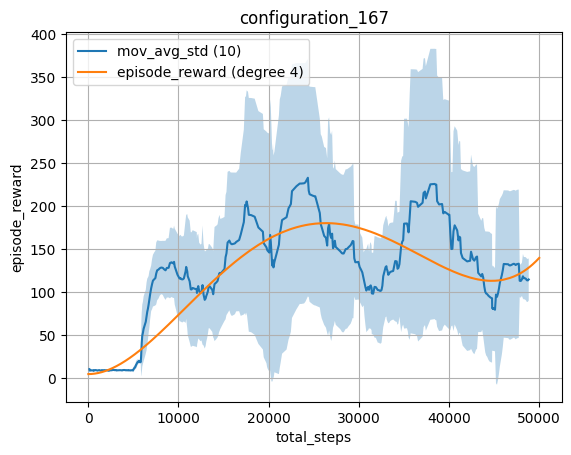

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



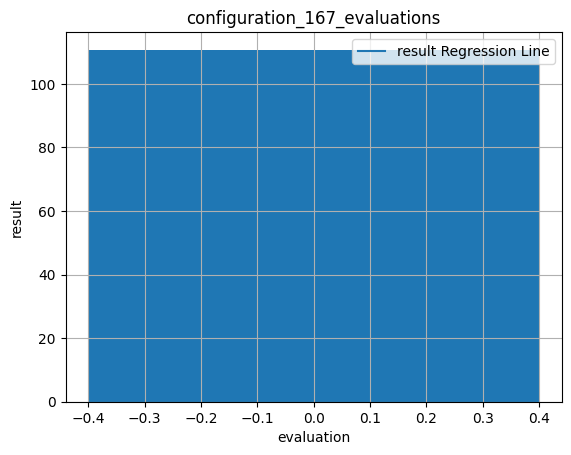

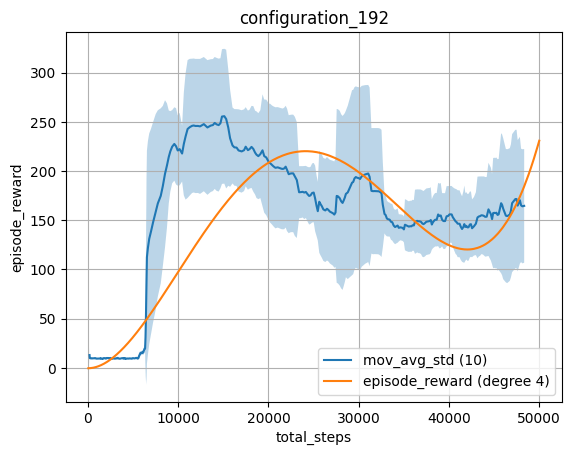

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



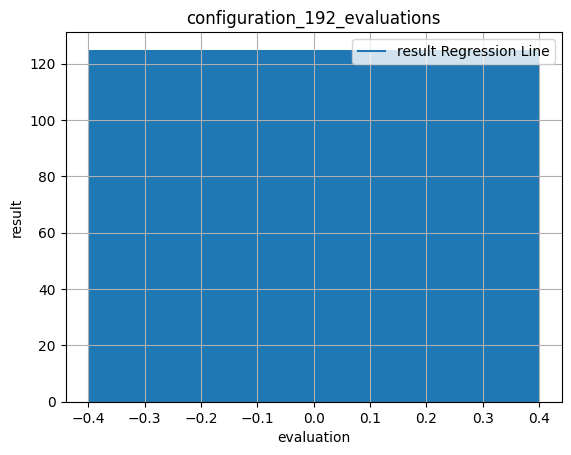

In [27]:
for n_completed_steps in pruned_optuna_trials_per_steps.keys():
    
    #correct this
    pruned_optuna_trials : list[optuna.Trial] = pruned_optuna_trials_per_steps[n_completed_steps][-BEST_PRUNED:] 
    
    pruned_trials = [f'configuration_{trial.number}' for trial in pruned_optuna_trials ]

    for configuration_name in pruned_trials:
        
        results_logger = results_of_configurations[configuration_name]
    
        study_of_configuration(configuration_name, results_logger)

## Completed Trials Evaluation

In [28]:
completed_optuna_trials = [trial for trial in optuna_study.trials if trial.state == optuna.trial.TrialState.COMPLETE]

completed_optuna_trials.sort(key=lambda trial: trial.value) # sort given the trial value


### Worst Completed Performances

In [29]:
N_WORST = 3

In [30]:

worst_optuna_trials = completed_optuna_trials[0:N_WORST]

worst_configurations_to_study = [f"configuration_{trial.number}" for trial in worst_optuna_trials]

print(f"Worst configurations to study: {worst_configurations_to_study}")

Worst configurations to study: ['configuration_86', 'configuration_27', 'configuration_0']


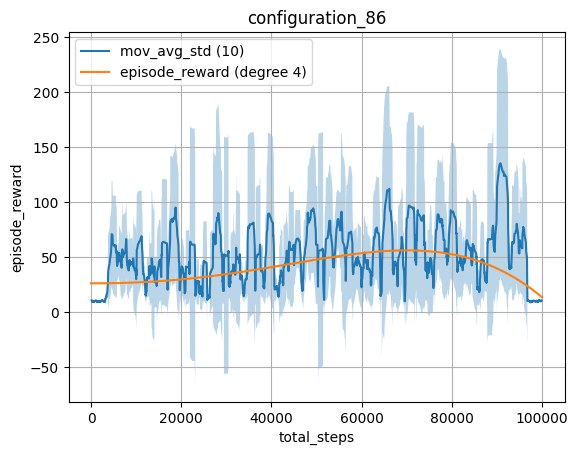

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



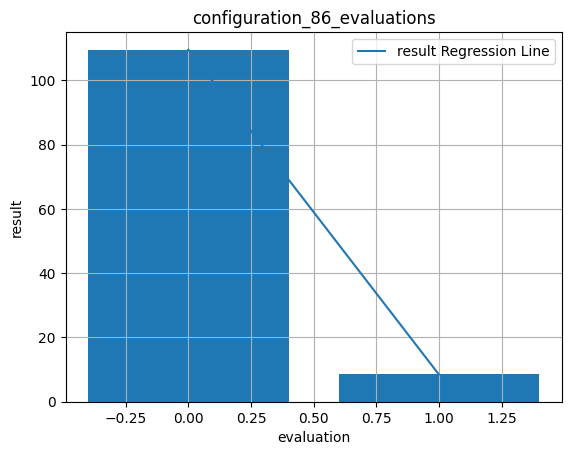

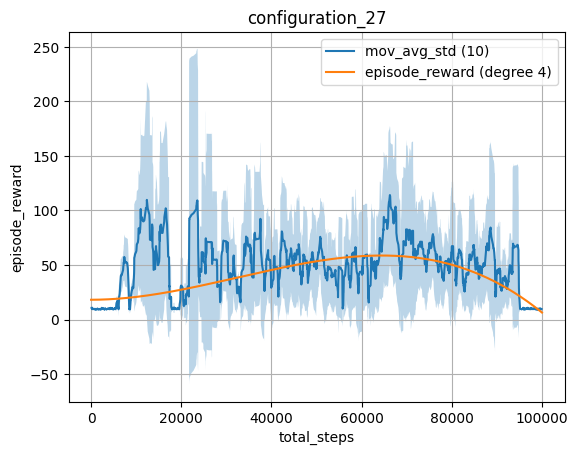

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



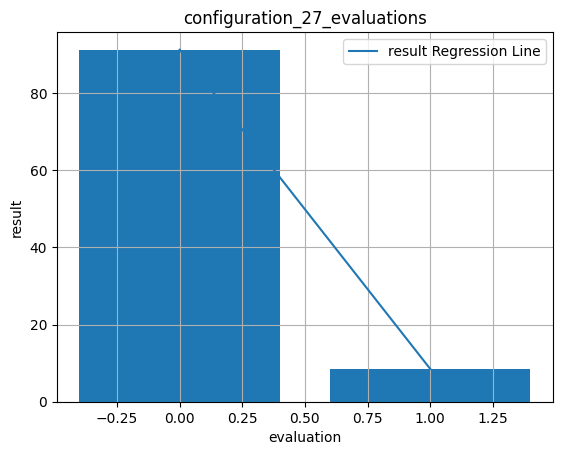

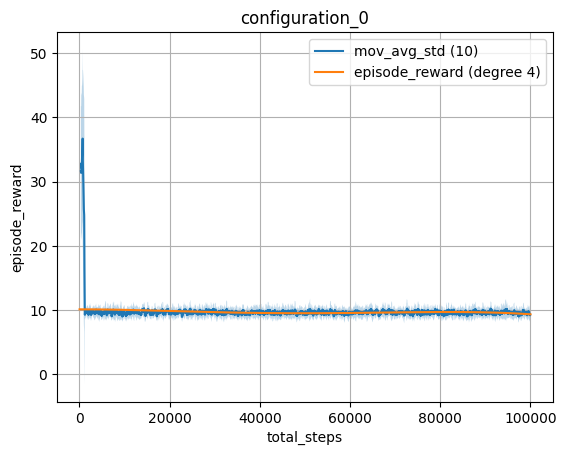

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



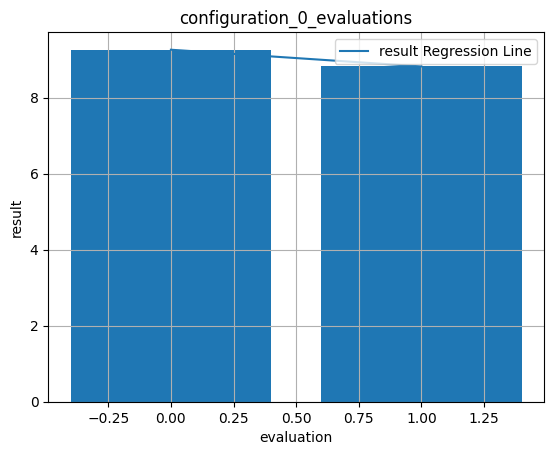

In [31]:
for configuration_name in worst_configurations_to_study:
    
    results_logger = results_of_configurations[configuration_name]

    study_of_configuration(configuration_name, results_logger)



## Non Completed Performances

In [32]:
non_completed_optuna_trials = [trial for trial in optuna_study.trials if trial.state == optuna.trial.TrialState.RUNNING or trial.state == optuna.trial.TrialState.WAITING]

non_completed_optuna_trials.sort(key=lambda trial: trial.value) # sort given the trial value

### All non completed trials

In [33]:
non_completed_trials = [f"configuration_{trial.number}" for trial in non_completed_optuna_trials]


In [34]:
for configuration_name in non_completed_trials:

    try:
    
        results_logger = results_of_configurations[configuration_name]

        study_of_configuration(configuration_name, results_logger)

    except:
        print(f"Could not look into non completed configuration: {configuration_name}")

## Best Performances

In [35]:
N_BEST = 3

In [36]:
best_optuna_trials = completed_optuna_trials[(len(completed_optuna_trials) - N_BEST):]

best_configurations_to_study = [f"configuration_{trial.number}" for trial in best_optuna_trials]

print(f"Best configurations to study: {best_configurations_to_study}")

Best configurations to study: ['configuration_130', 'configuration_135', 'configuration_191']


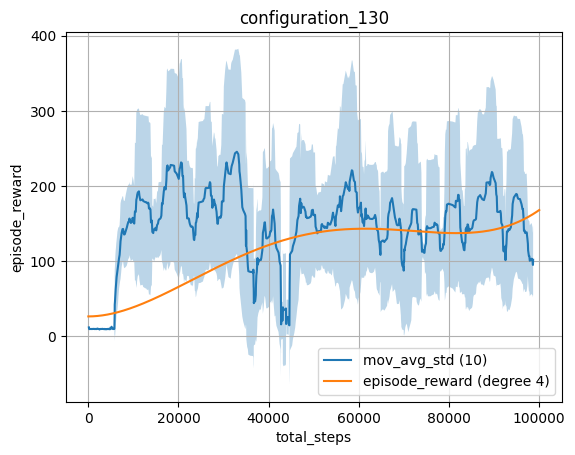

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



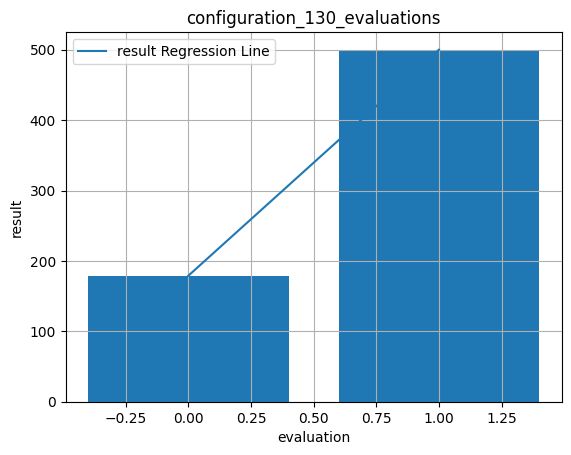

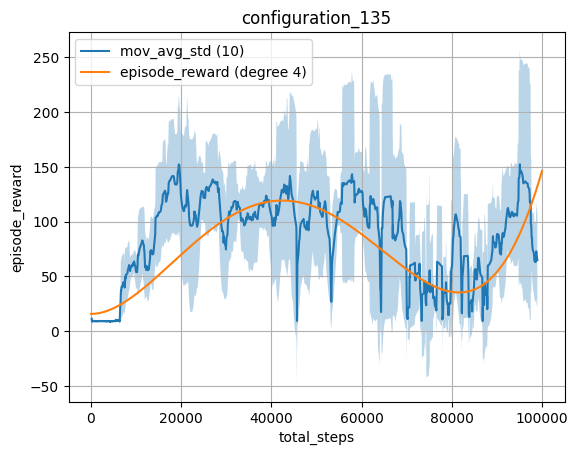

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



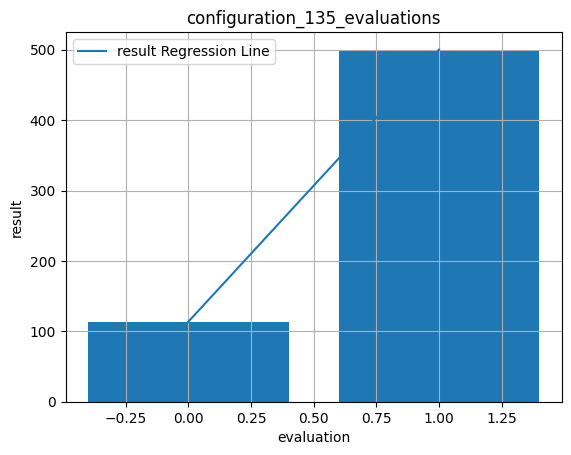

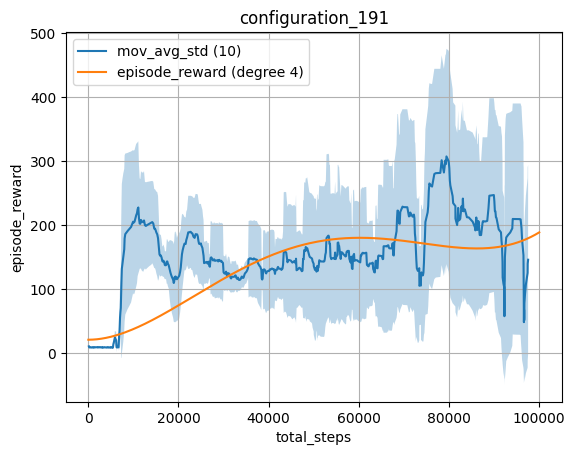

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



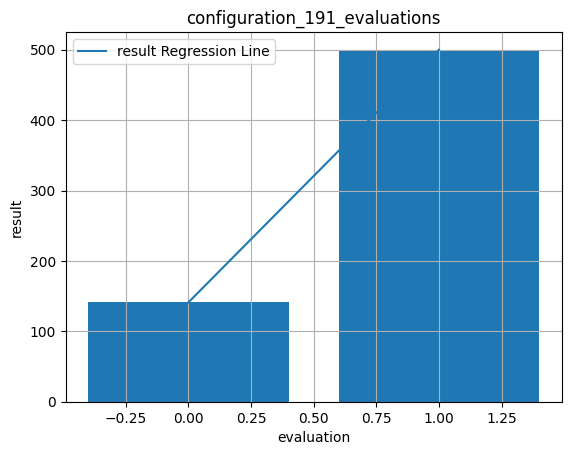

In [37]:
for configuration_name in best_configurations_to_study:
    
    results_logger = results_of_configurations[configuration_name]

    study_of_configuration(configuration_name, results_logger)

# Smaller study

## Configuration study in optuna

In [38]:
#trials_to_study = [0]


In [39]:
from automl.hp_opt.hp_eval_results.hp_eval_results import get_trials_with_decreasing_intermediates, print_intermidiate_values
trials_to_study = get_trials_with_decreasing_intermediates(optuna_study)


In [40]:

print_intermidiate_values(trials_to_study, optuna_study)

trial 0: 9.263069360623708, 8.823223304703363
trial 1: 32.42683351262765, 22.321350343362454
trial 2: 21.23824157868658, 9.376393202250021
trial 3: 140.07005639217297, 20.812539308564823
trial 5: 47.53262081443634, 17.10876536632938
trial 8: 100.06260593981237, 97.34486843117566
trial 11: 86.79792027106039, 17.878901122312968
trial 22: 361.6104883066361, 149.26499185669914
trial 27: 91.18166998673296, 8.526138721247417
trial 34: 91.33053751818963, 87.60313318068434
trial 36: 171.8770306193872, 14.924709341619671
trial 37: 89.38920808187112, 89.02445677833893
trial 60: 102.68765246170203, 88.47403987973986
trial 61: 95.22991228745043, 40.28065044950046
trial 70: 310.5027781076018, 201.27114884682416
trial 72: 166.94890947578813, 158.32294901687516
trial 74: 92.85227744249484, 87.02137942488012
trial 86: 109.48961925330067, 8.474039879739868
trial 88: 147.62829175487371, 91.71911539845821
trial 98: 117.50266124169343, 102.8354172754725
trial 99: 207.30460712505274, 71.79687743759898
tria

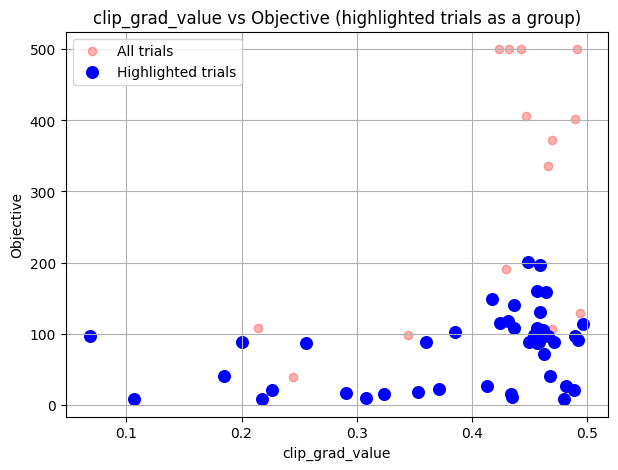

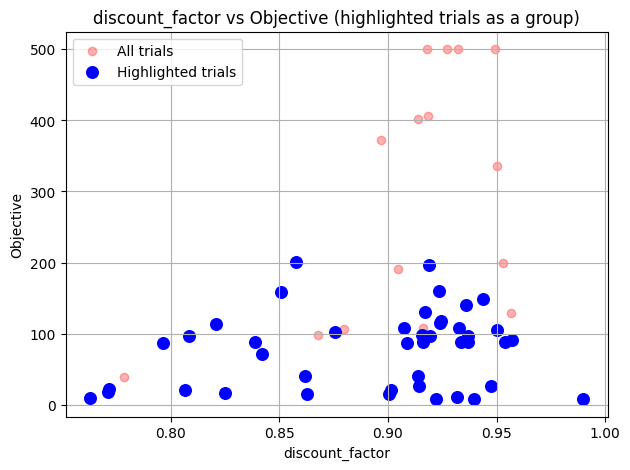

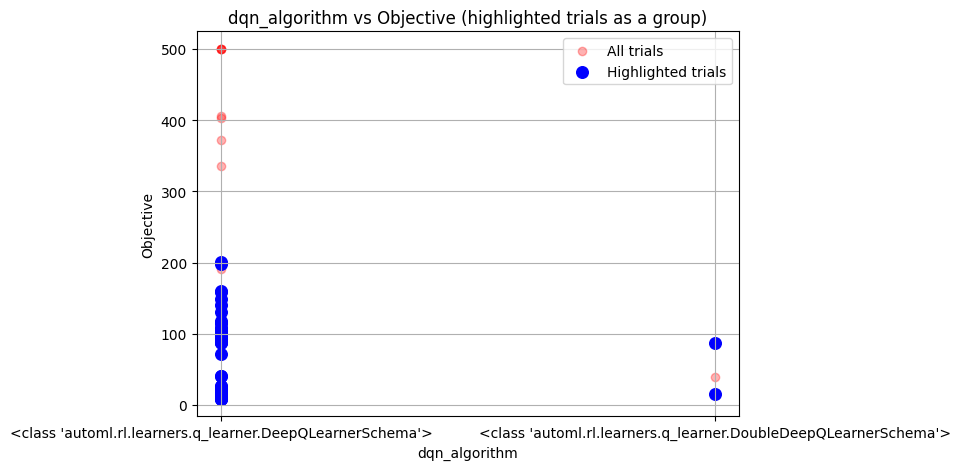

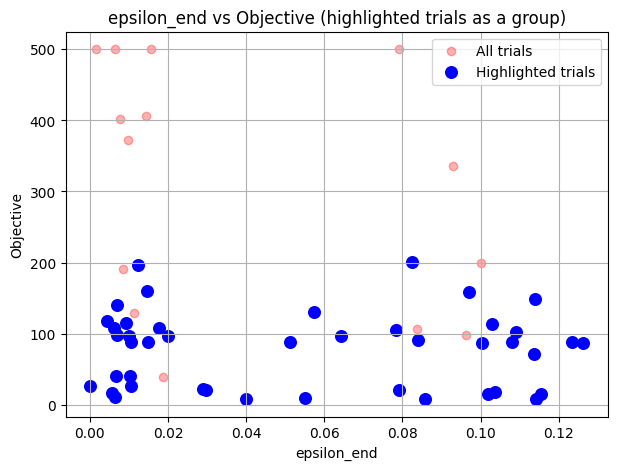

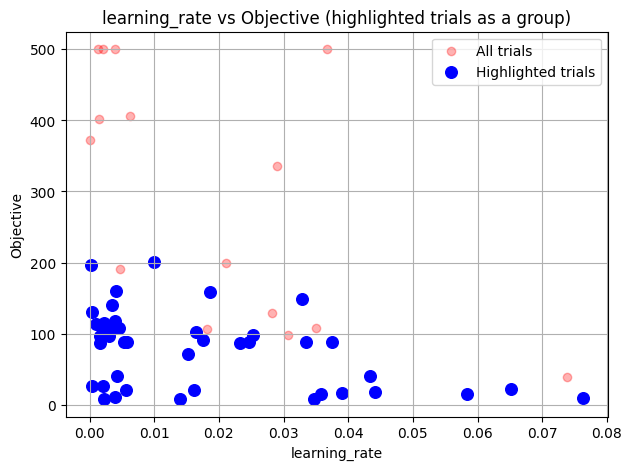

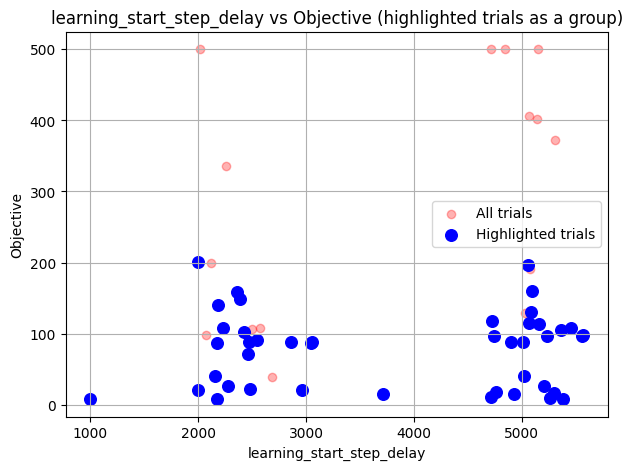

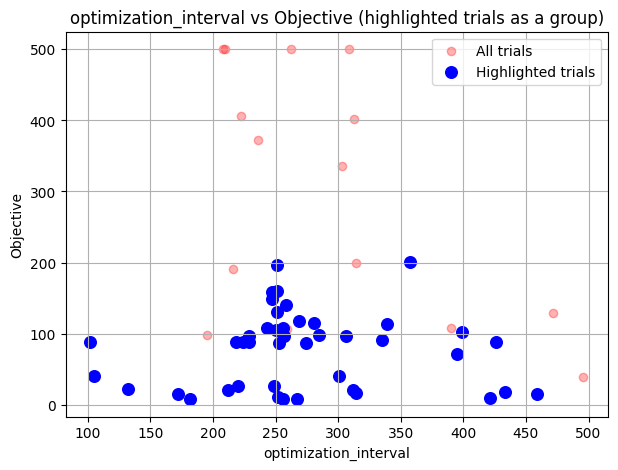

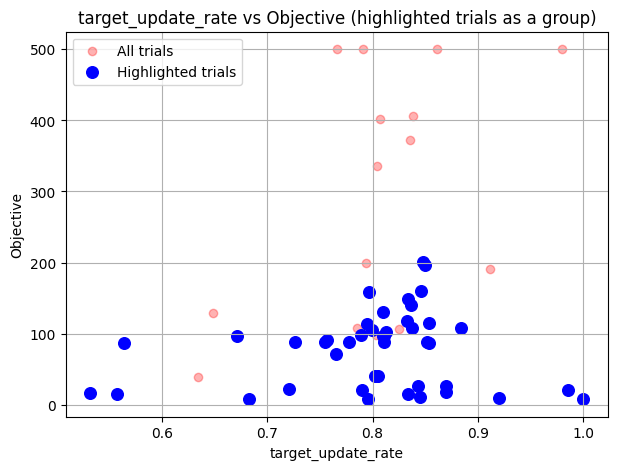

In [41]:
from automl.hp_opt.hp_eval_results.hp_eval_results import plot_scattered_values_for_param

try:
    plot_scattered_values_for_param(optuna_study, trials_to_study)

except Exception as e:
    print(f"Could not plot scattered values because of error: {e}")

## Results study

In [42]:
configurations_to_study = [f'configuration_{trial_n}' for trial_n in trials_to_study]

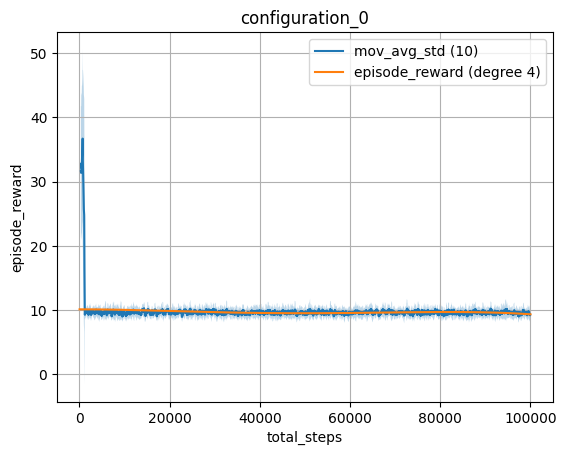

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



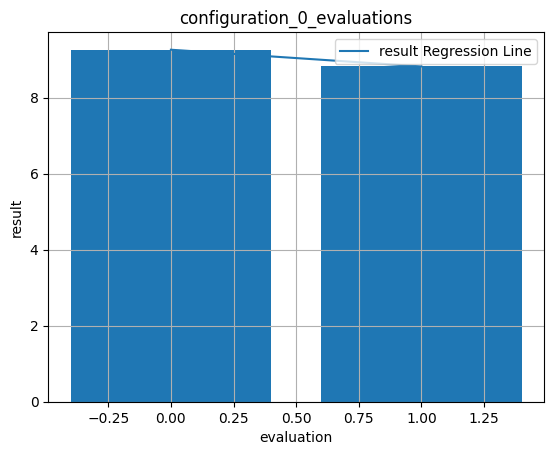

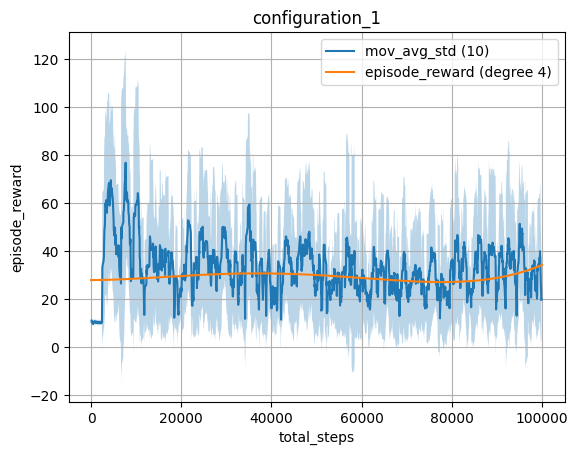

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



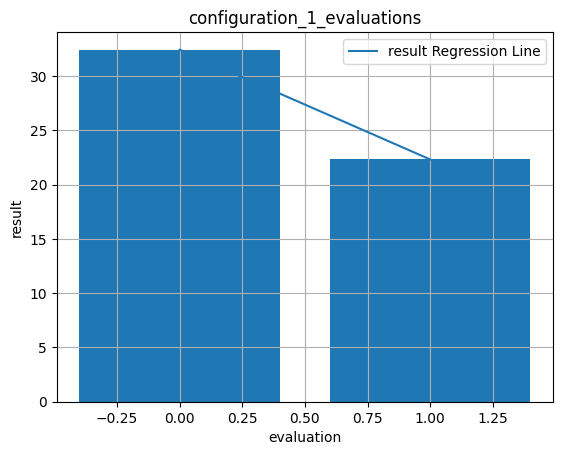

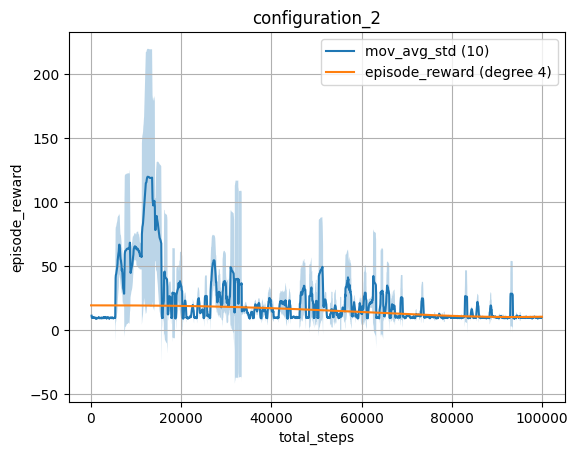

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



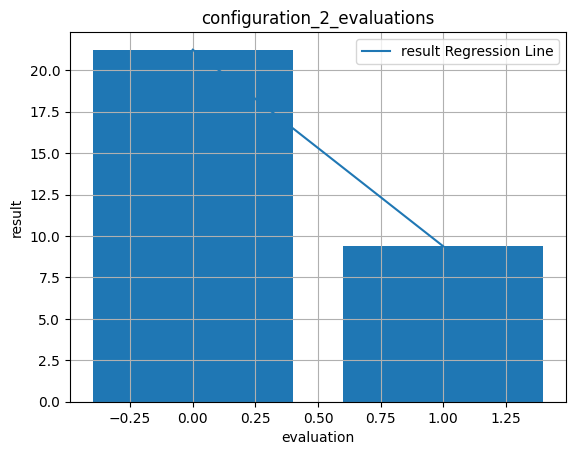

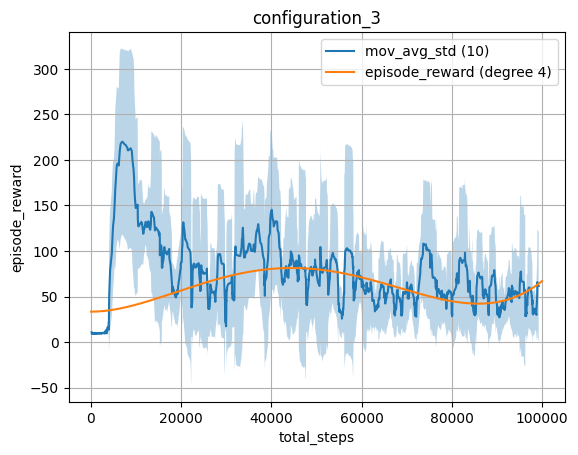

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



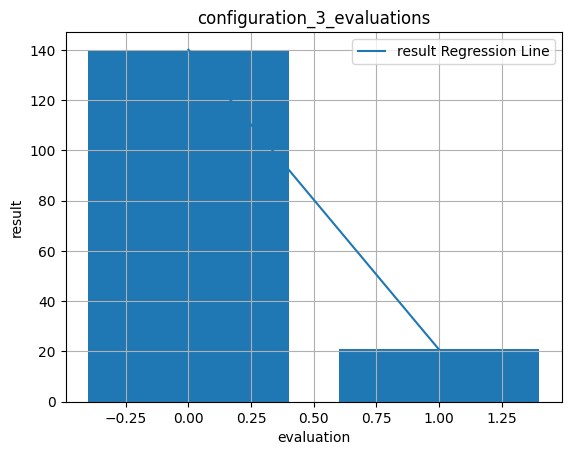

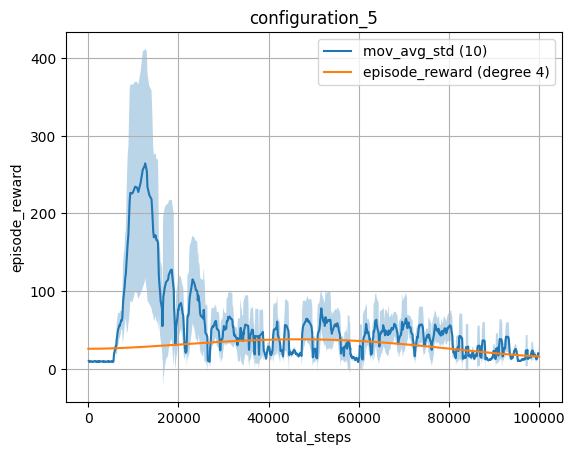

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



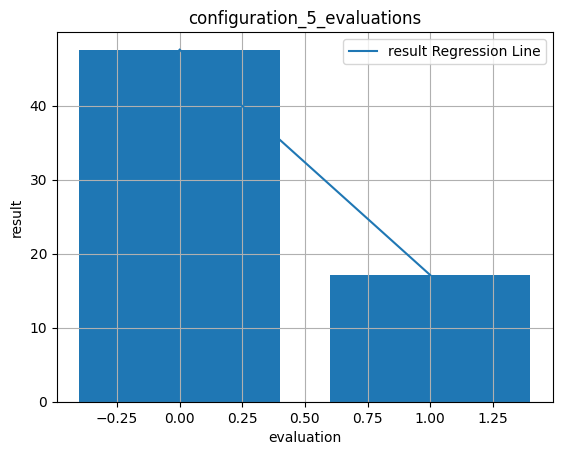

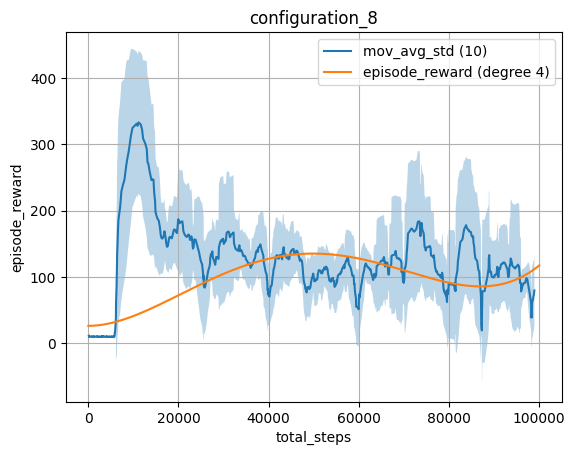

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



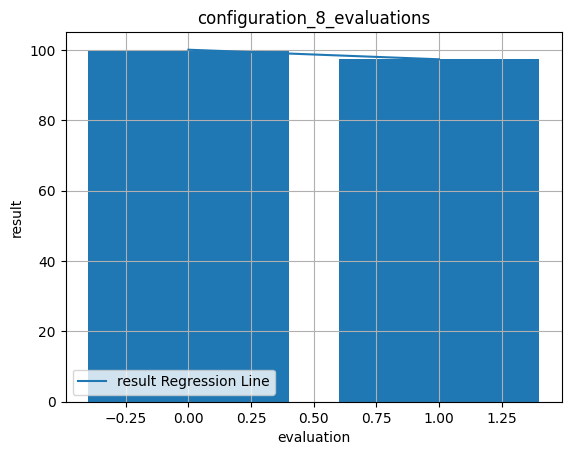

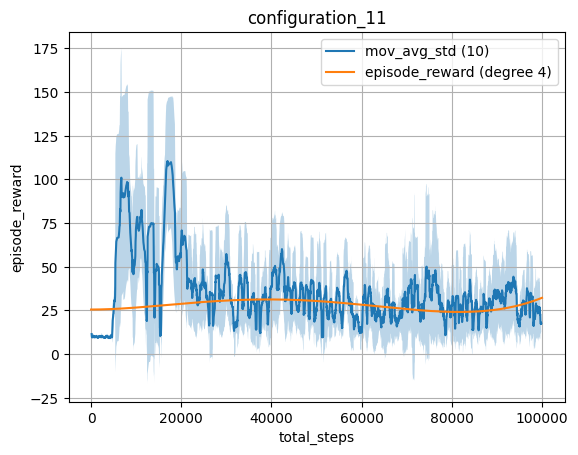

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



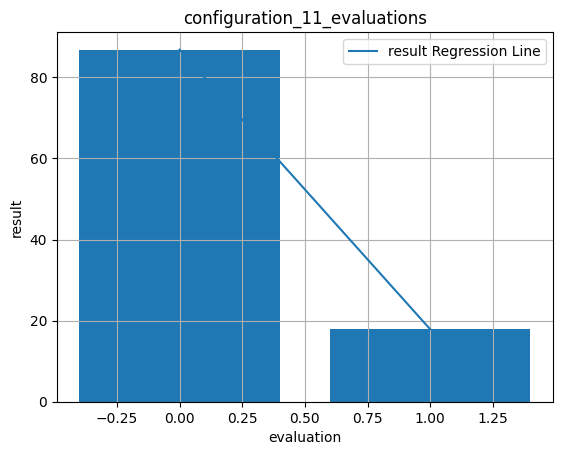

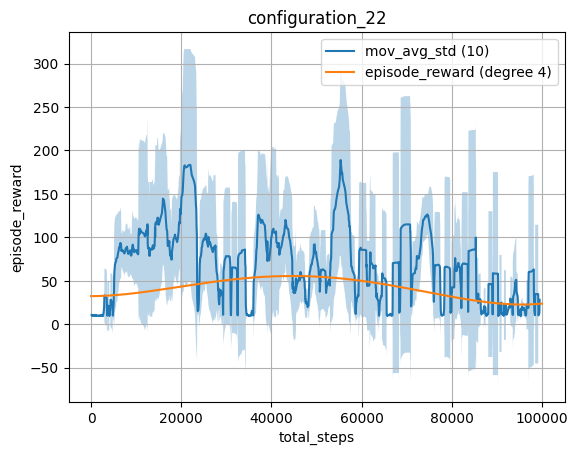

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



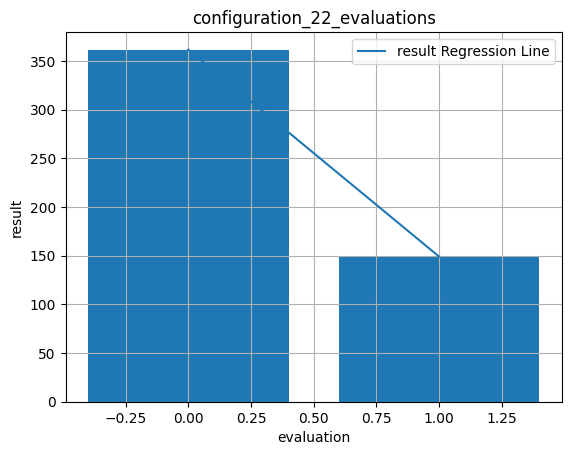

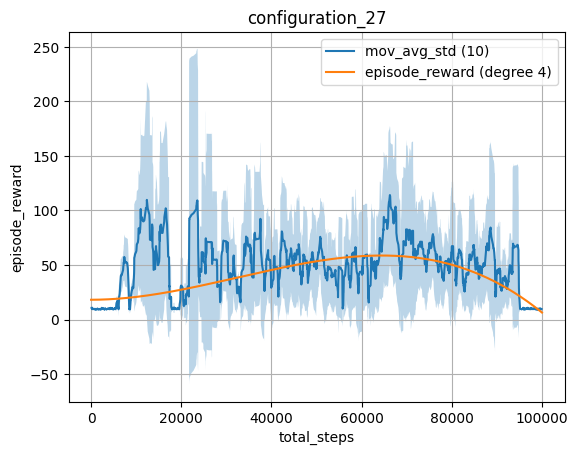

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



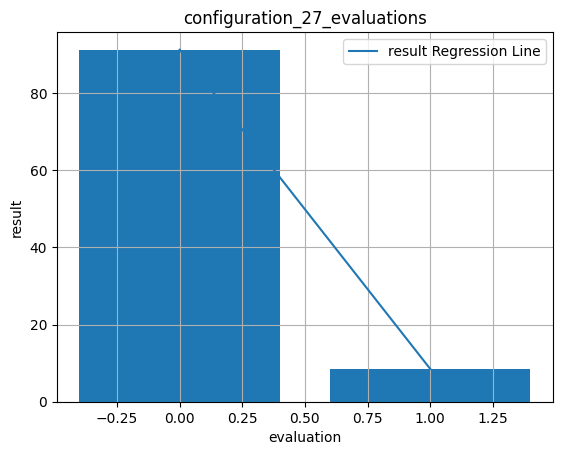

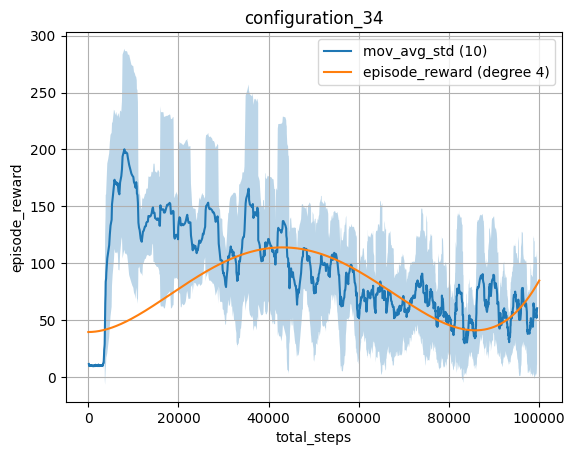

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



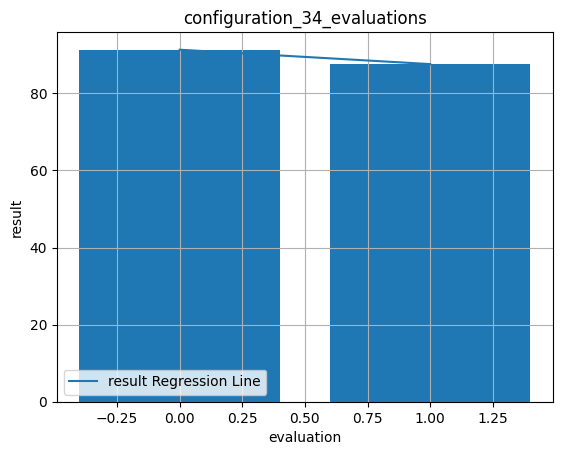

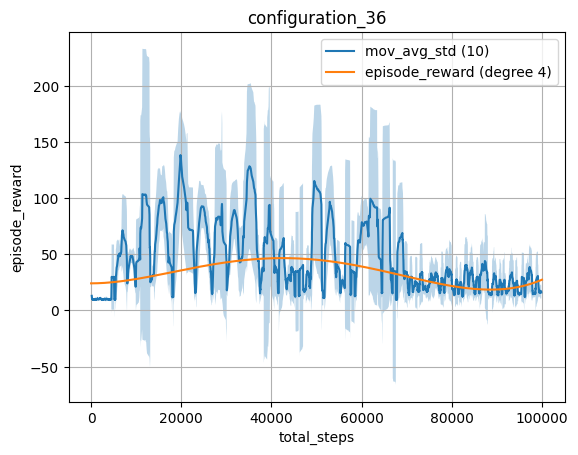

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



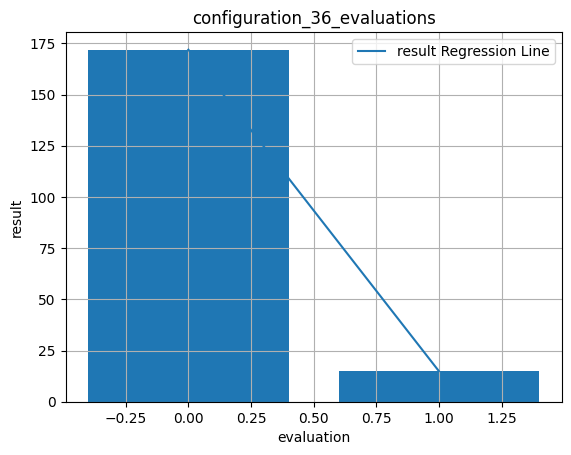

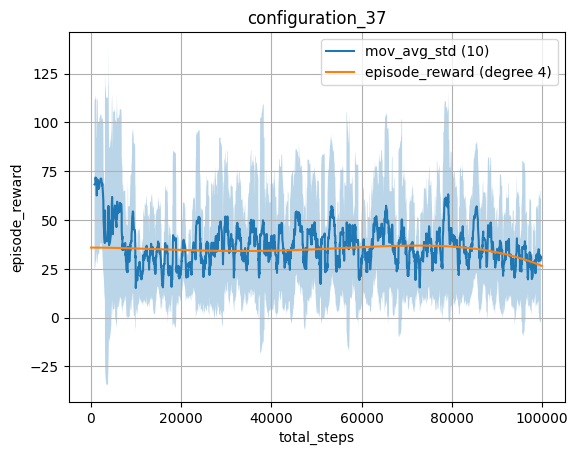

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



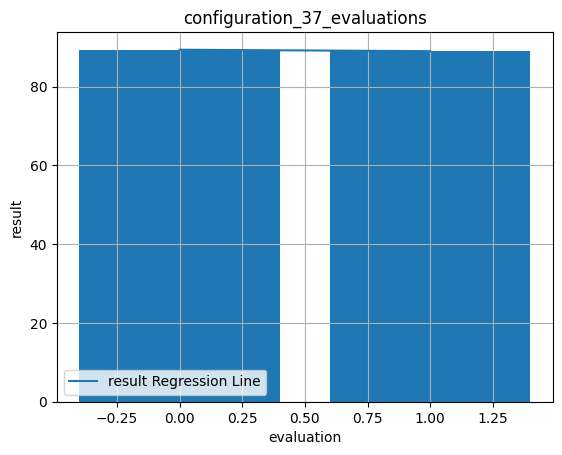

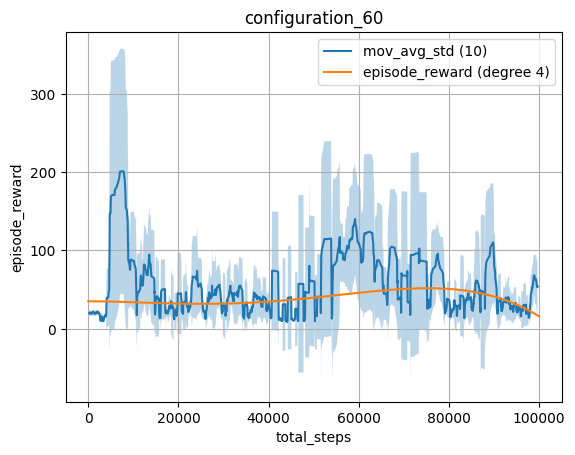

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



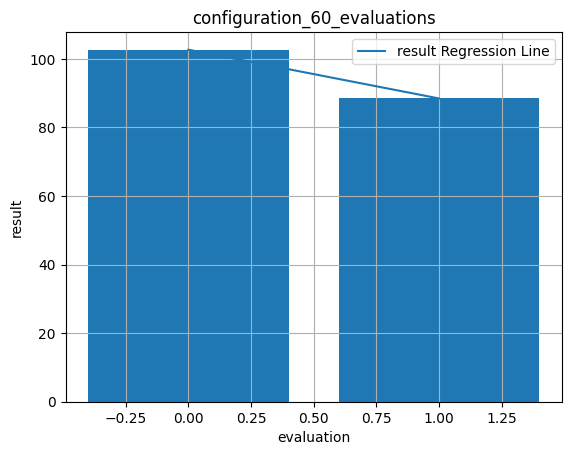

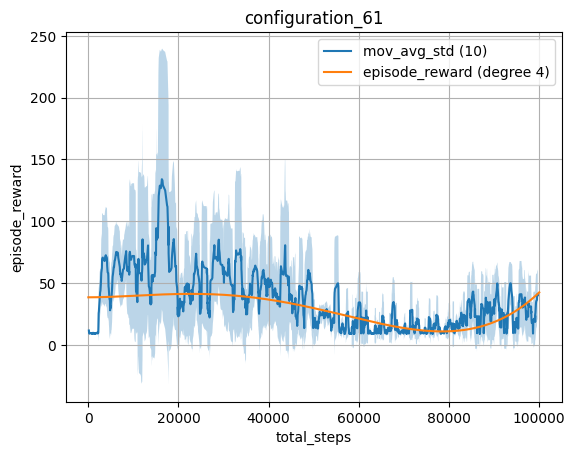

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



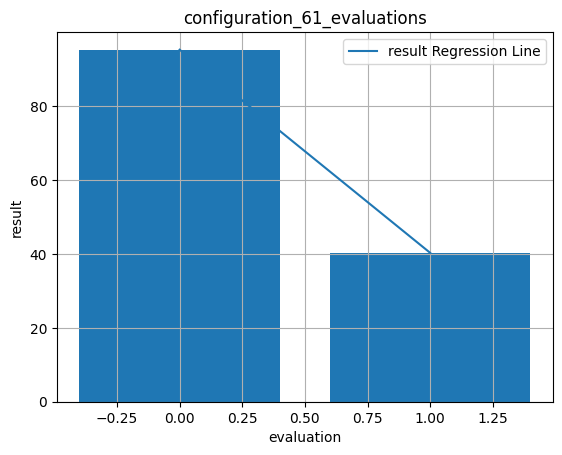

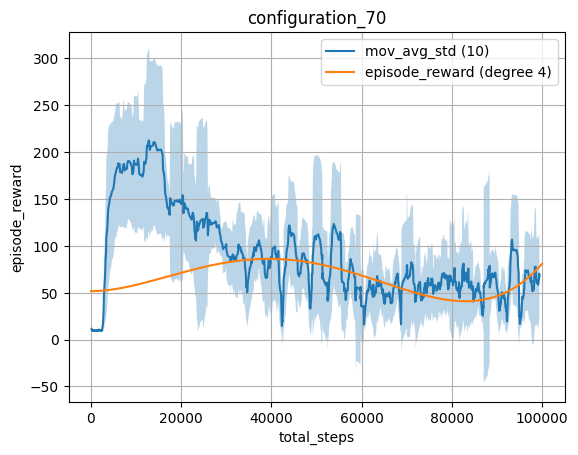

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



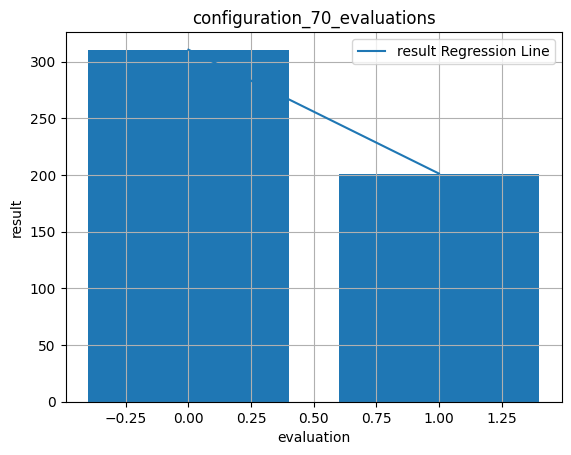

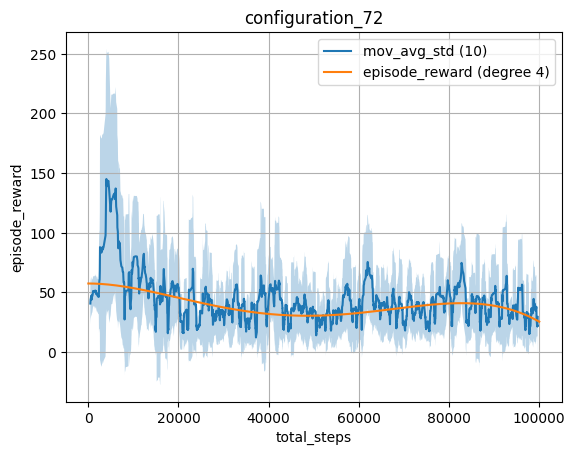

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



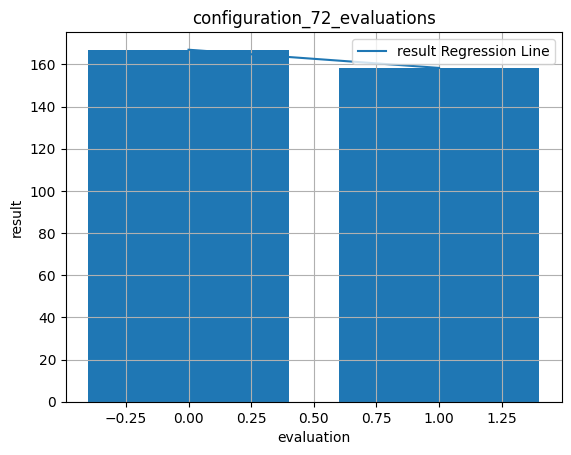

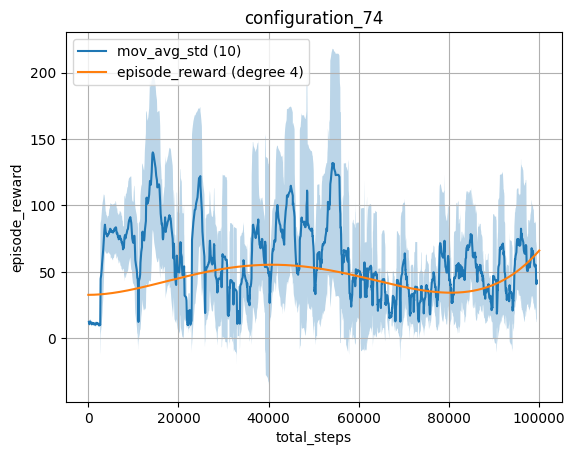

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



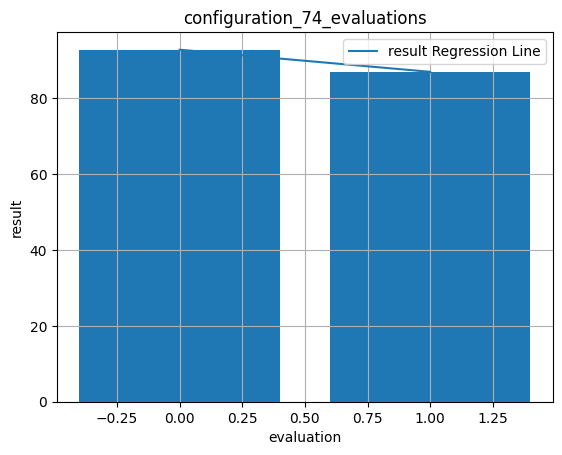

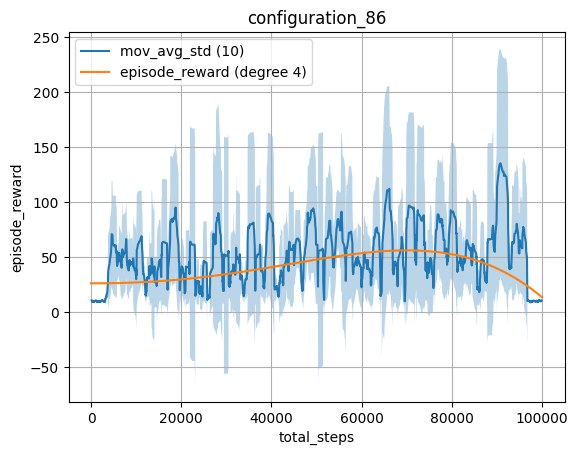

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



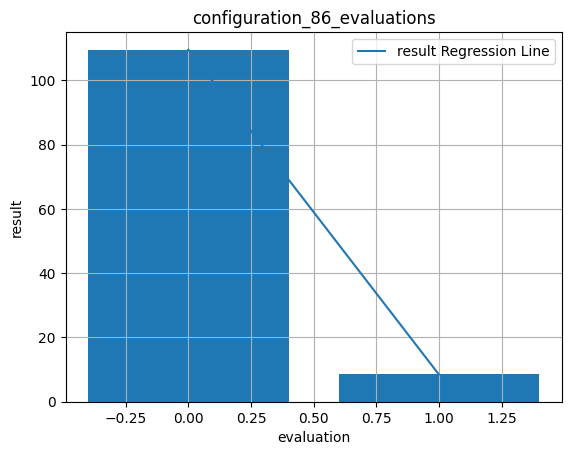

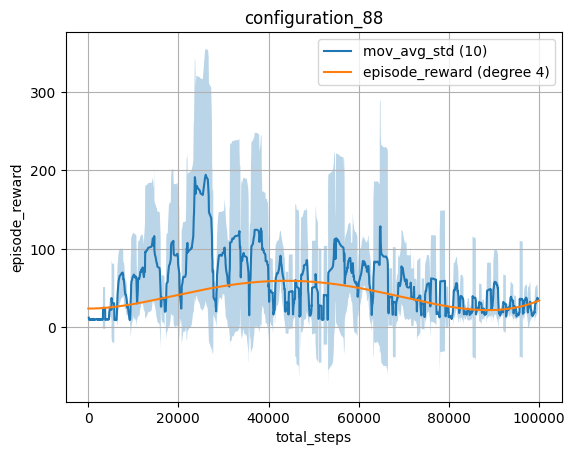

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



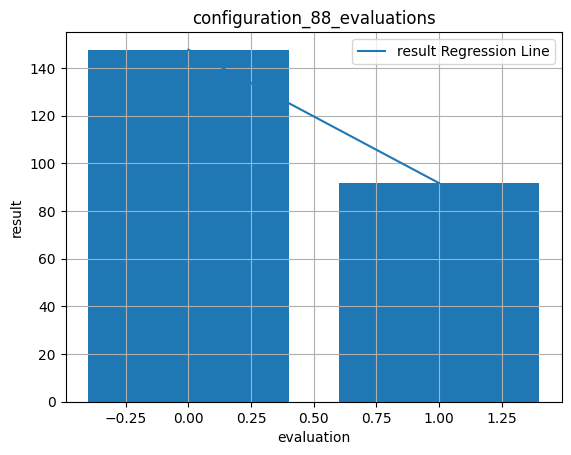

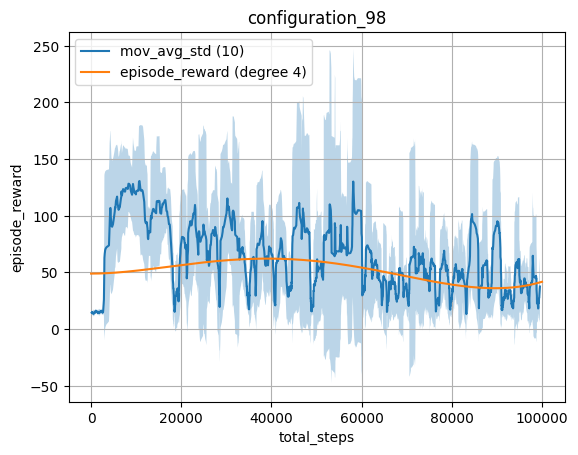

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



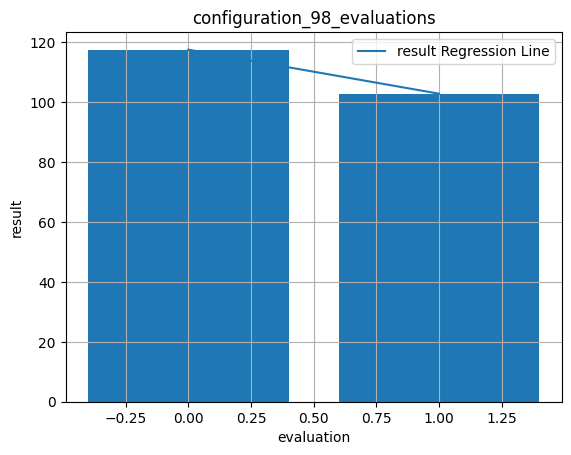

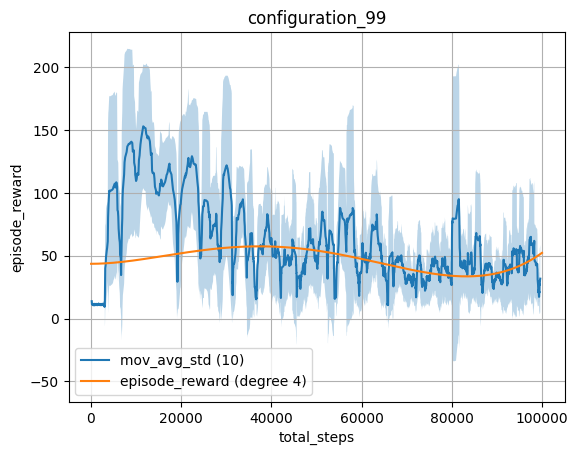

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



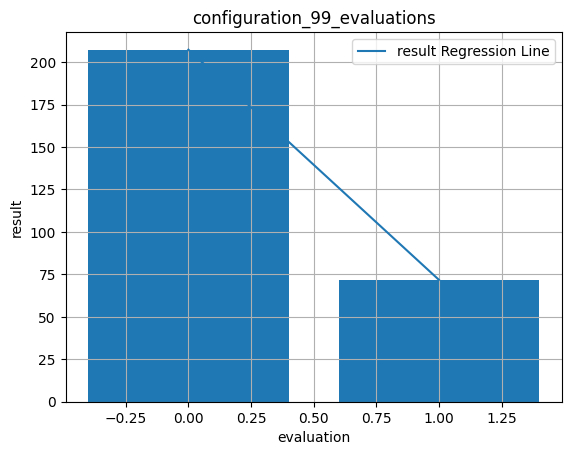

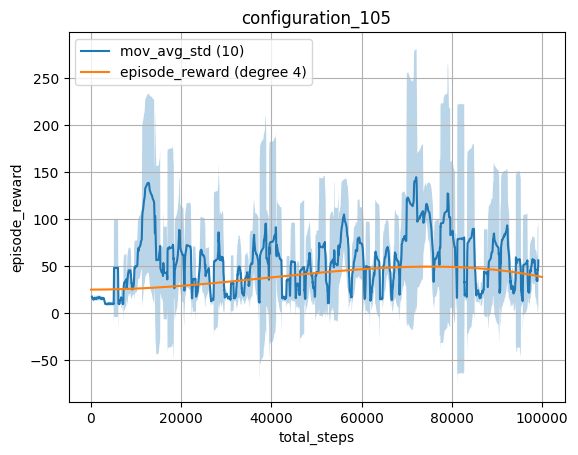

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



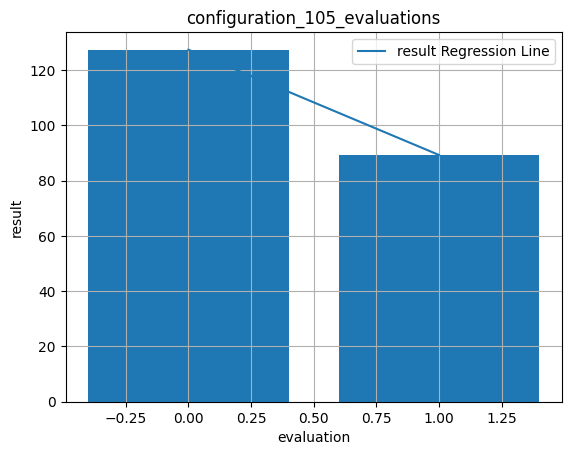

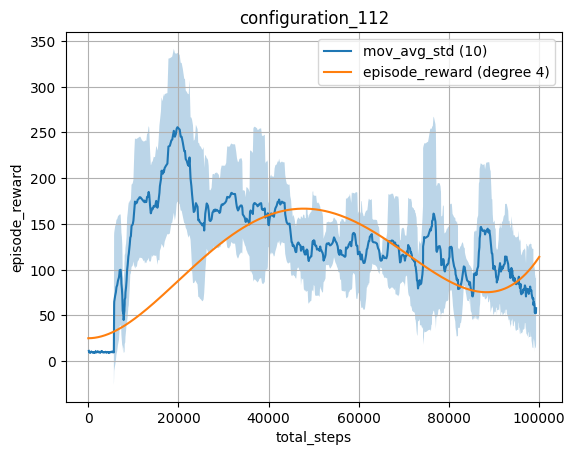

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



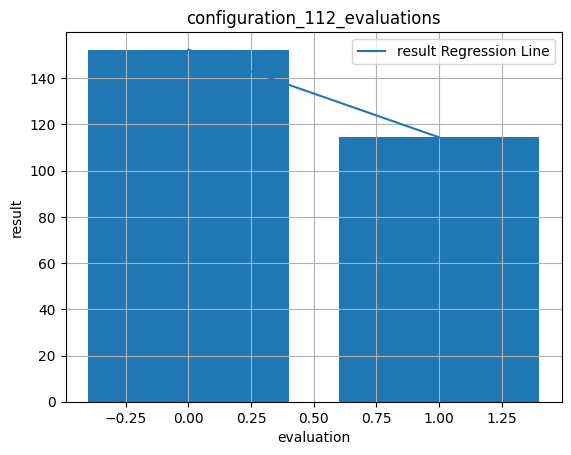

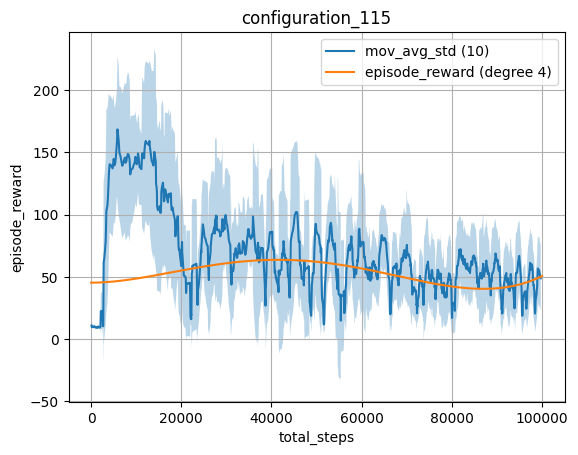

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



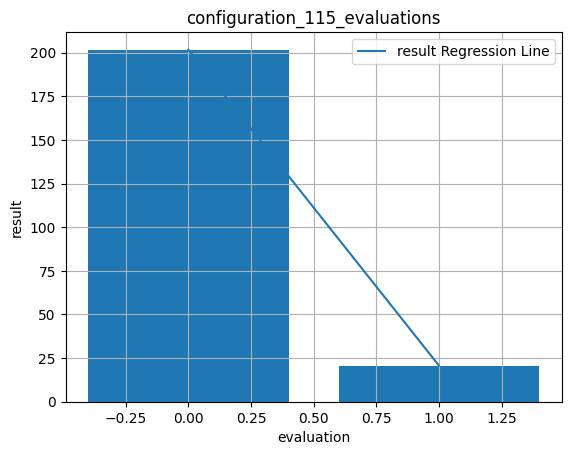

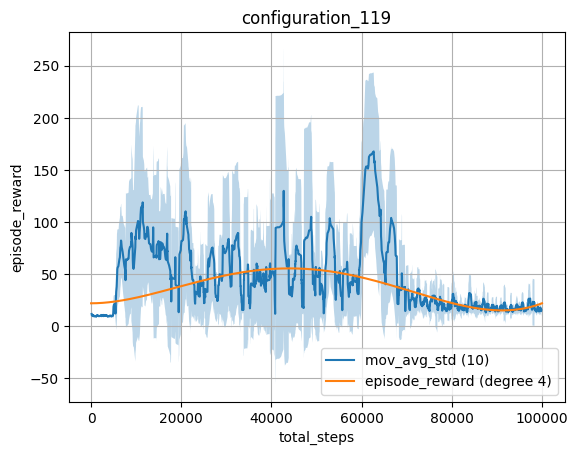

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



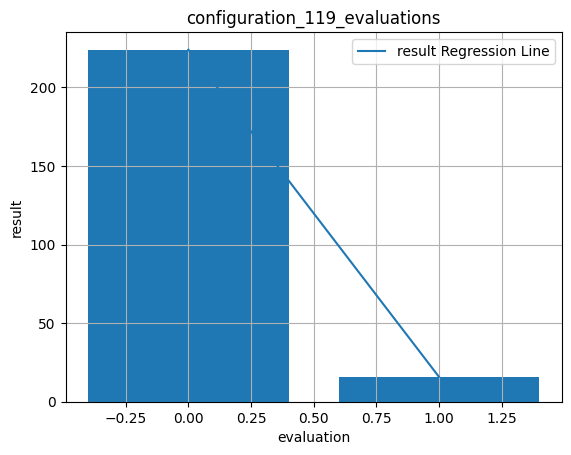

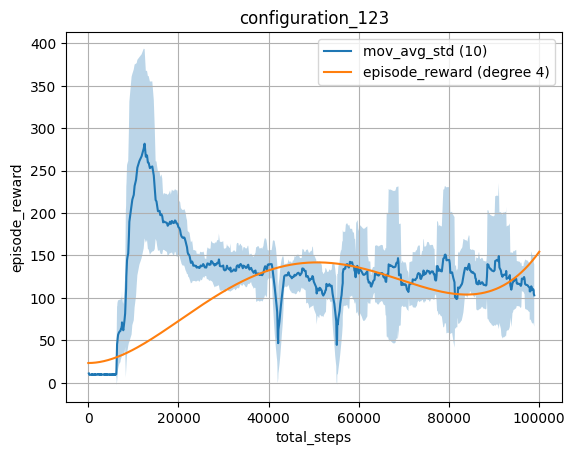

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



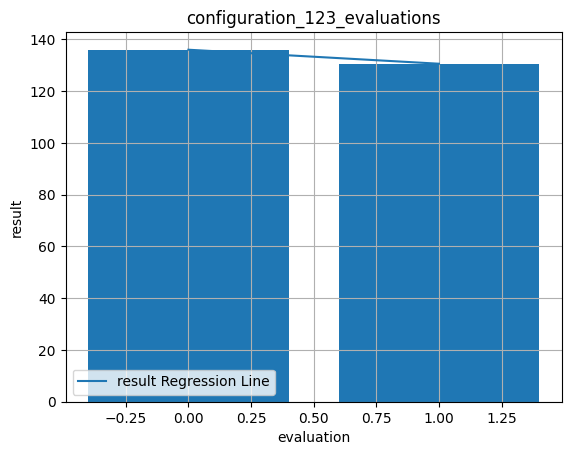

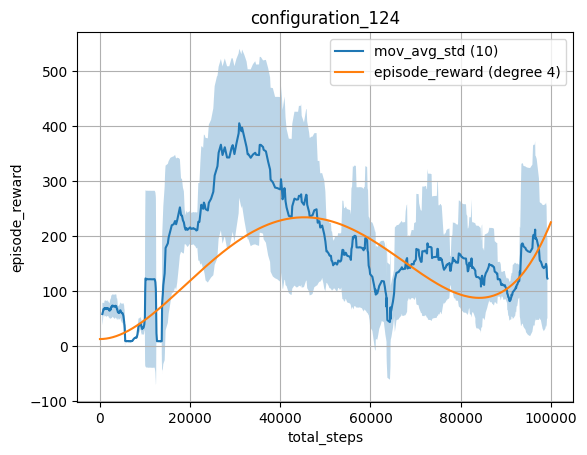

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



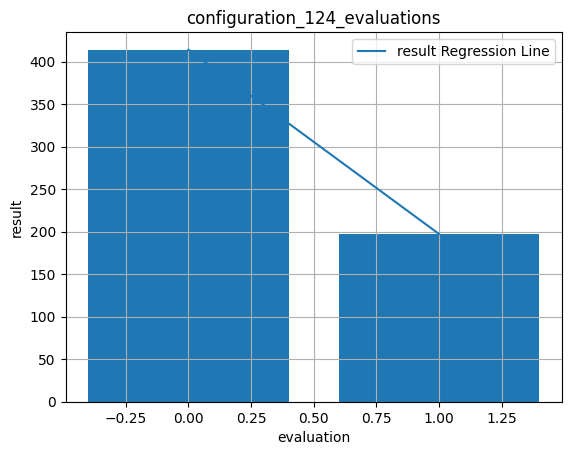

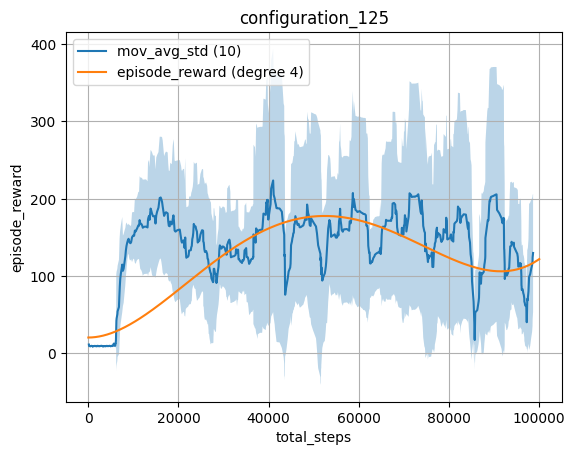

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



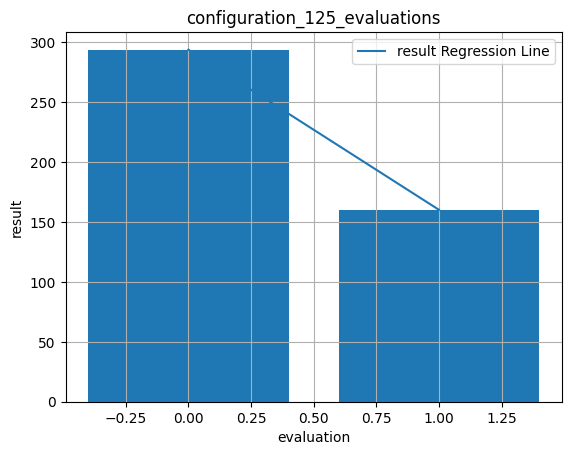

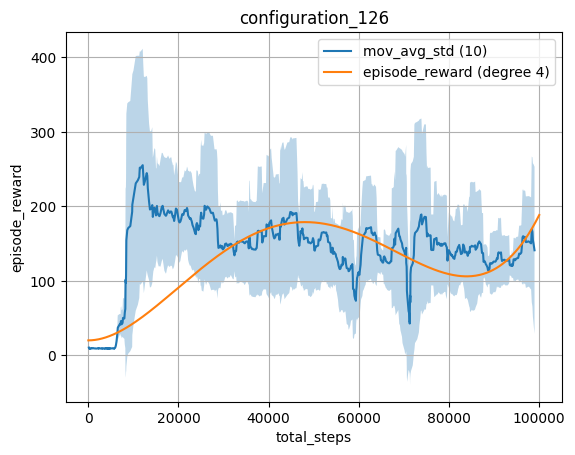

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



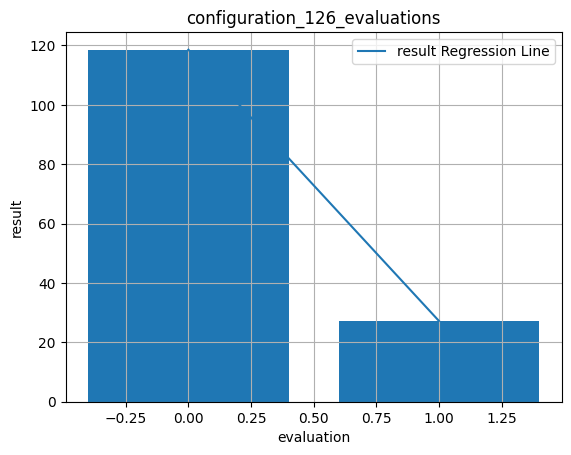

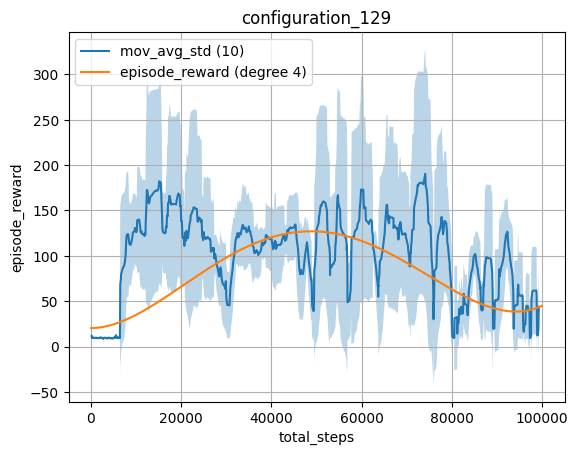

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



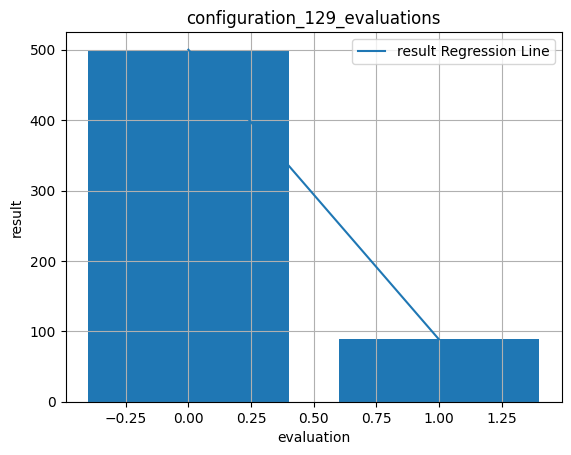

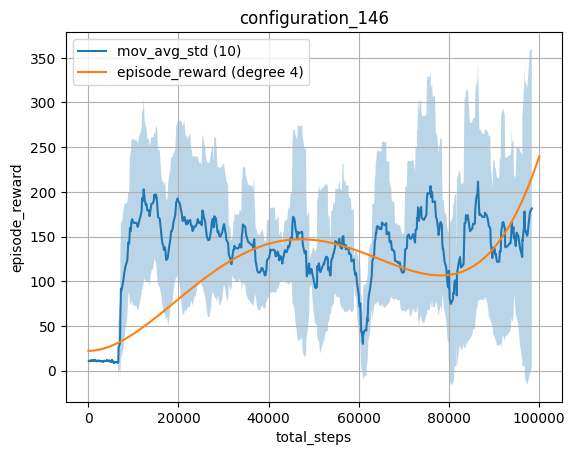

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



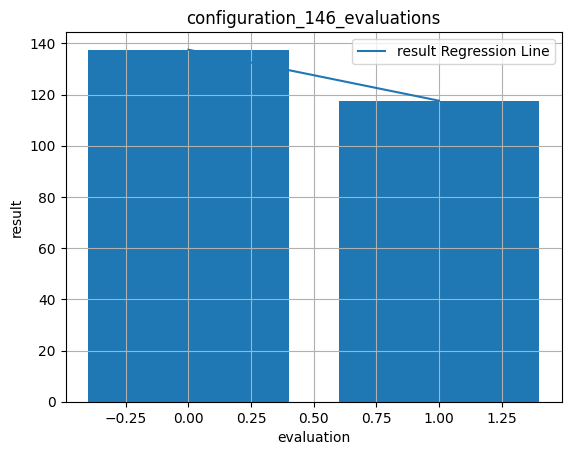

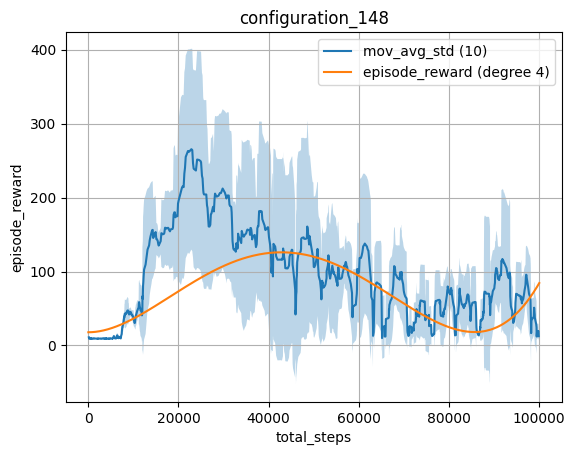

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



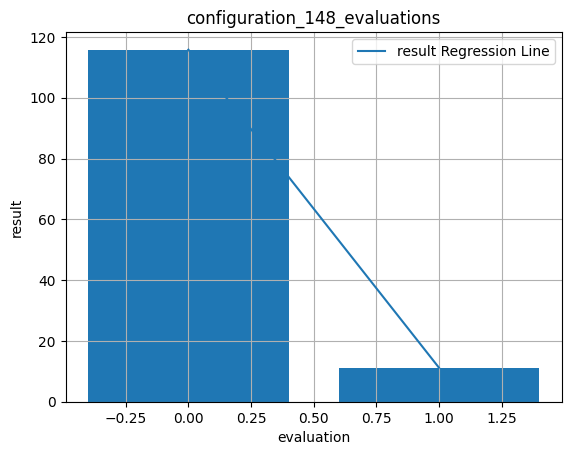

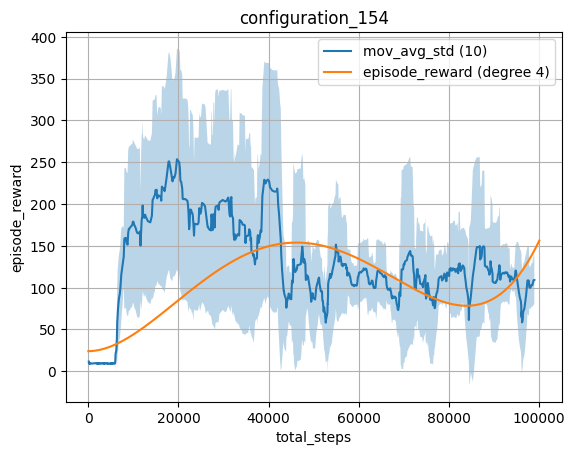

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



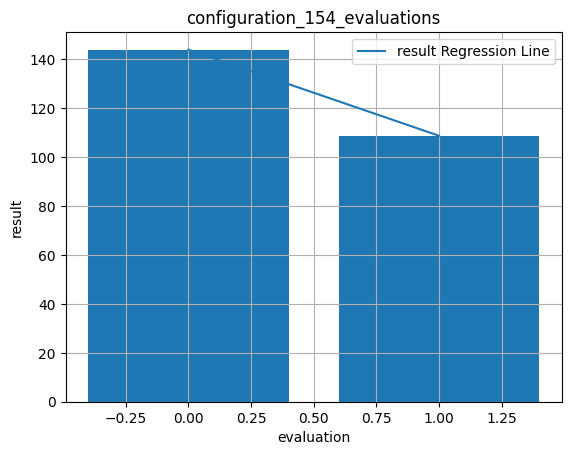

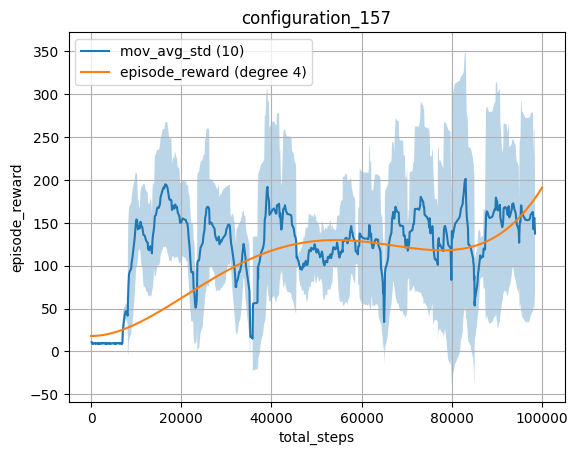

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



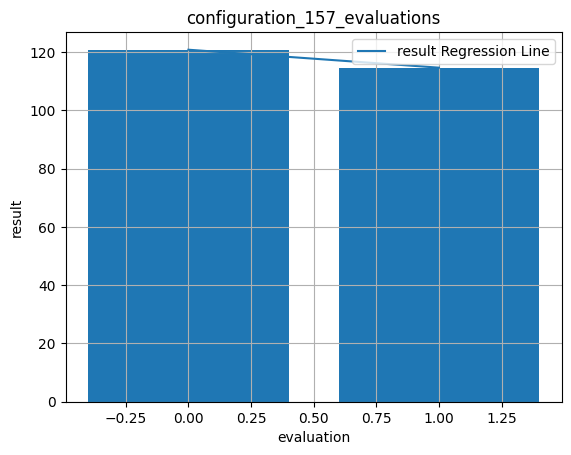

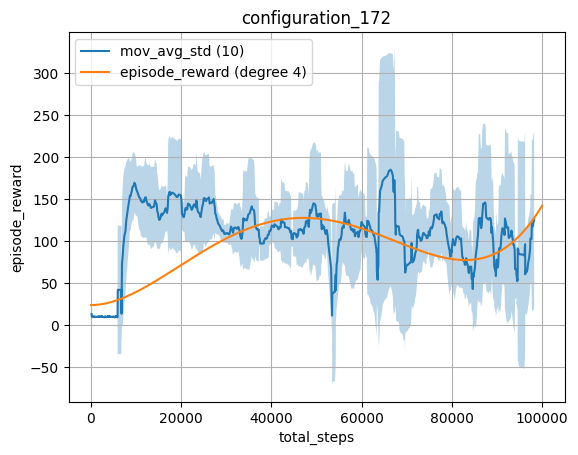

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



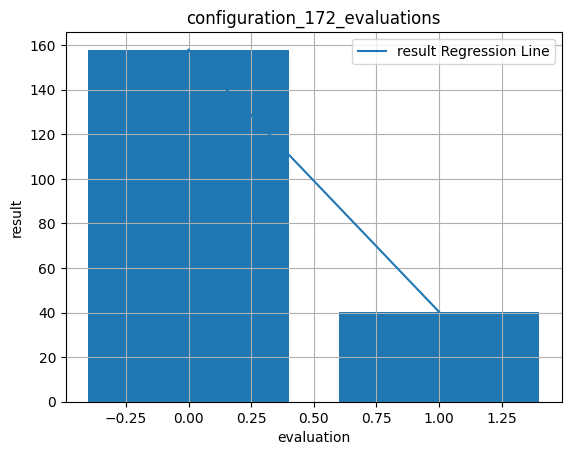

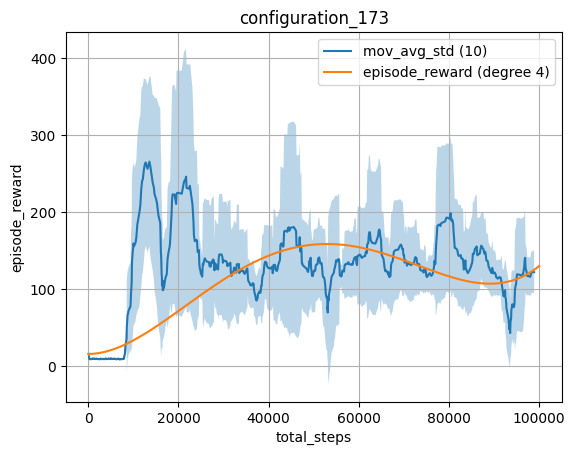

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



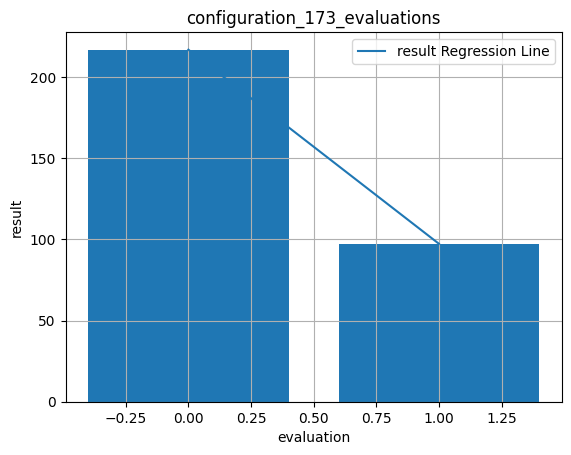

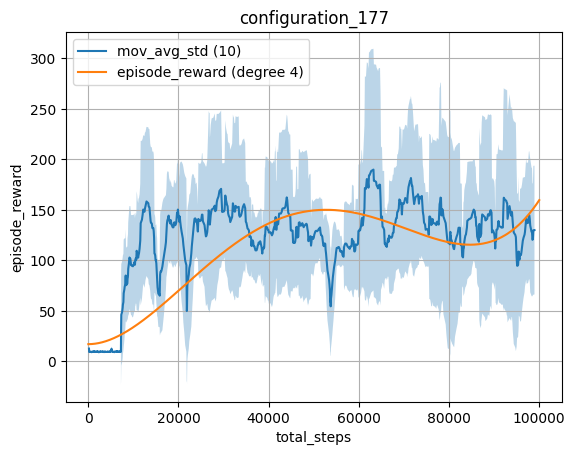

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



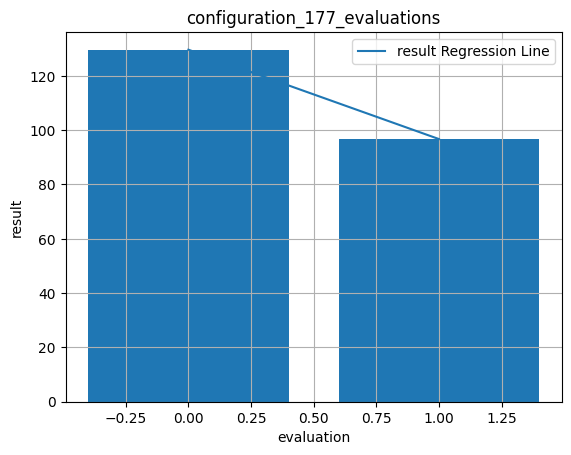

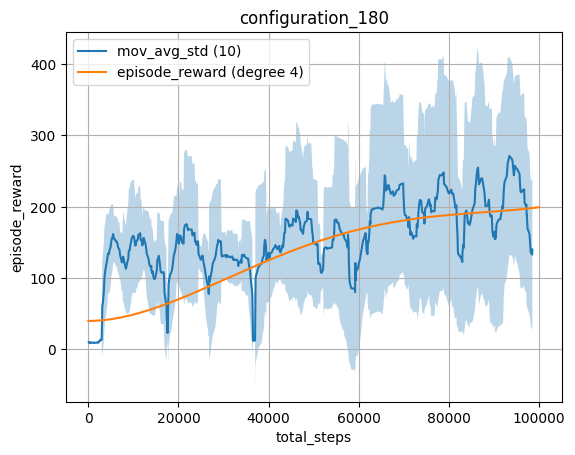

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



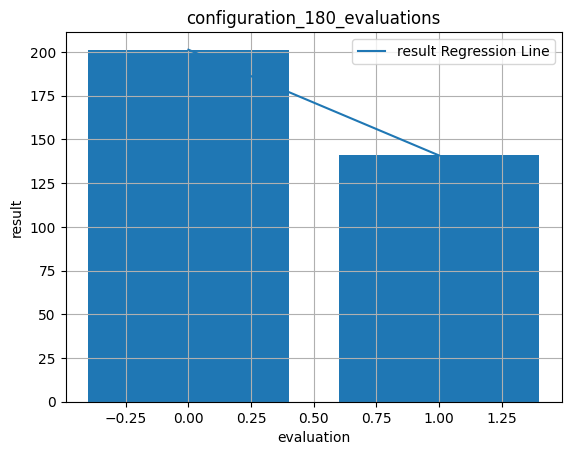

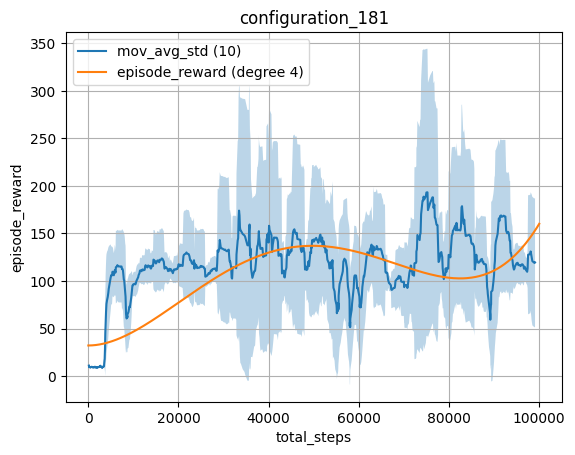

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



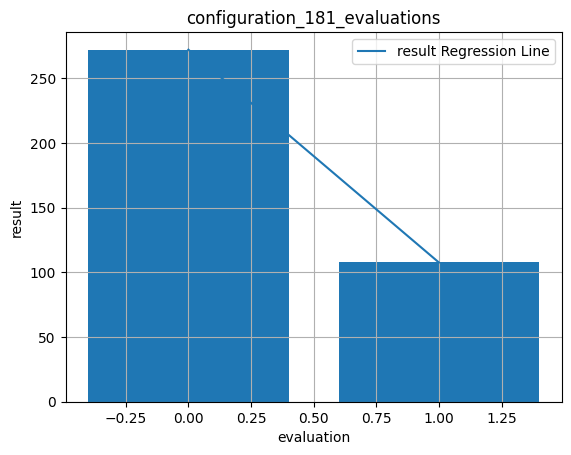

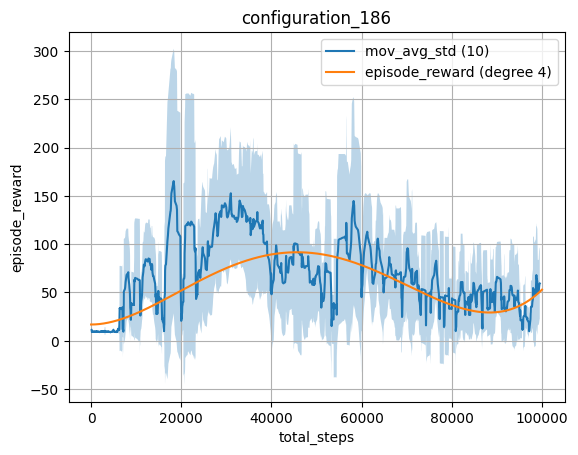

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



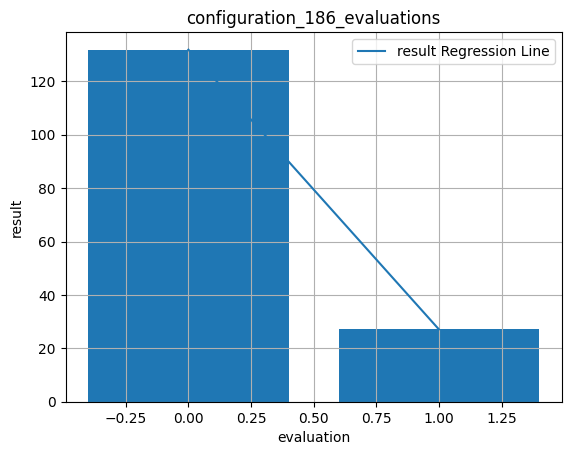

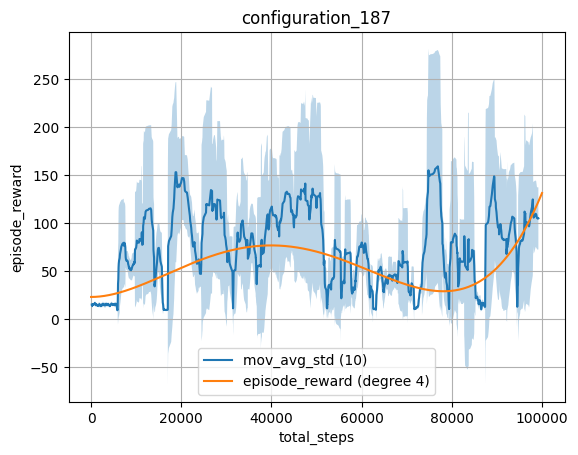

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



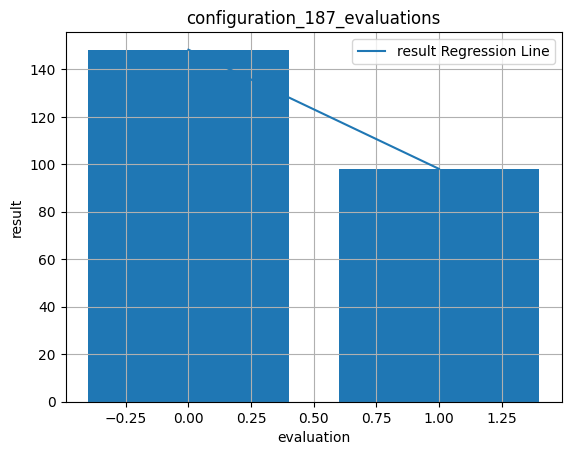

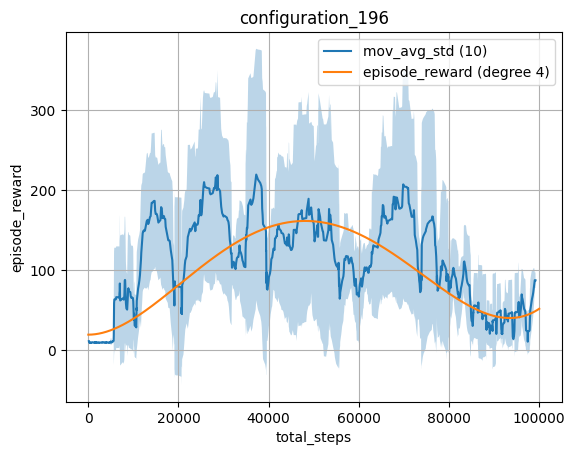

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



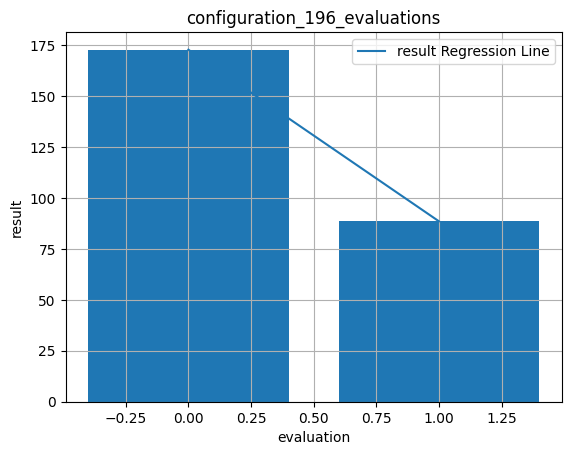

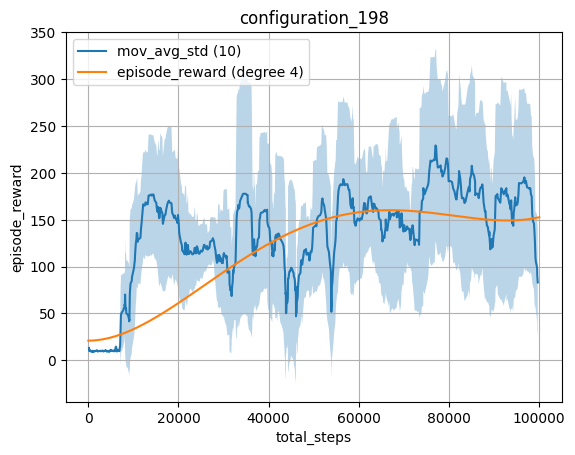

c:\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:212: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



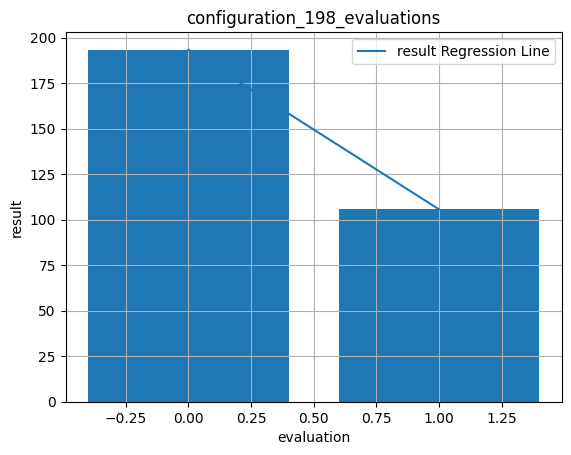

In [43]:

try:

    for configuration_name in configurations_to_study:
    
        results_logger = results_of_configurations[configuration_name]

        study_of_configuration(configuration_name, results_logger)

except KeyError as e:
    print(f"KeyError: {e}\nAvailable keys are {results_of_configurations.keys()}")
    raise e

### Study for each agent

In [44]:
agents_in_study = []
# agents_in_study = ["agent_1", "agent_2"]

In [45]:
agents_to_study : dict[str, ResultLogger]= {}

for configuration_name in configurations_to_study:
    
    results_logger = results_of_configurations[configuration_name]
    
    for agent_name in agents_in_study:
      
        agent_results_logger = ResultLogger(input={
                                            "logger_directory" : f"{results_logger.lg.logDir}\\{agent_name}",
                                            "filename" : RESULTS_PATH,
                                            "create_new_directory" : False
                                          })

        agents_to_study[f"{configuration_name}_{agent_name}"] = agent_results_logger
        
        agent_results_logger.proccess_input()


In [46]:
for agent_name, agent_results_logger in agents_to_study.items():
    
    study_of_configuration(agent_name, agent_results_logger)